In [ ]:
import numpy as np

def uncertain_bellman_update(state, action, Q, U, R, P, gamma):
    """
    Performs an uncertain Bellman update for a given state-action pair.

    Args:
        state: Current state
        action: Action taken
        Q: Q-value function (expected reward)
        U: Uncertainty function (variance of reward)
        R: Reward function
        P: Transition function (probability of next state)
        gamma: Discount factor

    Returns:
        Updated Q-value and uncertainty for the state-action pair
    """

    next_states = P(state, action)  # Get possible next states and probabilities

    # Corrected loop - iterate over next_state and probability directly
    Q_next = 0
    U_next = 0
    for next_state, probability in next_states.items():
        Q_next += probability * (R(next_state) + gamma * np.max(Q[next_state]))
        U_next += probability * (U[next_state] + gamma**2 * np.max(U[next_state]))

    # Calculate maximum uncertainty of the next state
    U_next = np.max(U_next)

    # Update with a simple average (consider more sophisticated uncertainty propagation for better results)
    Q[state, action] = (Q[state, action] + Q_next) / 2
    U[state, action] = (U[state, action] + U_next) / 2

    return Q, U

# Example usage (replace with your specific environment functions)
def R(state):  # Sample reward function (modify for your environment)
    return np.random.rand()

def P(state, action):  # Sample transition function (modify for your environment)
    # Assuming two next states with equal probability
    next_states = {1: 0.5, 2: 0.5}
    return next_states

# Hyperparameters
gamma = 0.9  # Discount factor

# Initialize Q and U values (replace with your initialization logic)
Q = np.zeros((3, 2))  # Q-value for 3 states and 2 actions
U = np.zeros_like(Q)  # Uncertainty for 3 states and 2 actions

# Perform an example update for state 0 and action 0
Q, U = uncertain_bellman_update(0, 0, Q, U, R, P, gamma)

print("Updated Q-value:")
print(Q)
print("Updated Uncertainty:")
print(U)

Updated Q-value:
[[0.17388176 0.        ]
 [0.         0.        ]
 [0.         0.        ]]
Updated Uncertainty:
[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [ ]:
import numpy as np

# Define the number of states and actions
num_states = 3
num_actions = 2

# Define the random reward function
def random_reward(state):
    return np.random.rand()

# Define the random transition function
def random_transition(state, action):
    next_states = {}
    # Generate random transition probabilities for each next state
    for i in range(num_states):
        next_states[i] = np.random.rand()
    # Normalize probabilities to sum to 1
    total_prob = sum(next_states.values())
    for next_state in next_states:
        next_states[next_state] /= total_prob
    return next_states

# Example usage of uncertain_bellman_update with the random environment functions
gamma = 0.9  # Discount factor
Q = np.zeros((num_states, num_actions))  # Q-value for num_states states and num_actions actions
U = np.zeros_like(Q)  # Uncertainty for num_states states and num_actions actions

# Perform an example update for state 0 and action 0
Q, U = uncertain_bellman_update(0, 0, Q, U, random_reward, random_transition, gamma)

print("Updated Q-value:")
print(Q)
print("Updated Uncertainty:")
print(U)



Updated Q-value:
[[0.26894537 0.        ]
 [0.         0.        ]
 [0.         0.        ]]
Updated Uncertainty:
[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [ ]:
def uncertain_bellman_update(state, action, Q, U, R, P, gamma):
    next_states = P(state, action)  # Get possible next states and probabilities

    Q_next = 0
    U_next = 0
    for next_state, probability in next_states.items():
        i, j = next_state
        Q_next += probability * (R(next_state) + gamma * np.max(Q[i, j]))
        U_next += probability * (U[i, j] + gamma**2 * np.max(U[i, j]))

    # Update with a simple average
    i, j = state
    Q[i, j] = (Q[i, j] + Q_next) / 2
    U[i, j] = (U[i, j] + U_next) / 2

    return Q, U


In [ ]:
import numpy as np

# Environment size
GRID_SIZE = (3, 3)

# Actions
ACTIONS = {'UP': 0, 'DOWN': 1, 'LEFT': 2, 'RIGHT': 3}

def reward_function(state):
    """Deterministic reward function"""
    if state == (0, 1):
        return 1.0
    elif state == (1, 1):
        return -1.0
    else:
        return 0.0

def transition_function(state, action):
    """Deterministic transition function"""
    i, j = state
    next_states = {}
    if action == ACTIONS['UP']:
        next_states[(max(0, i - 1), j)] = 1.0
    elif action == ACTIONS['DOWN']:
        next_states[(min(GRID_SIZE[0] - 1, i + 1), j)] = 1.0
    elif action == ACTIONS['LEFT']:
        next_states[(i, max(0, j - 1))] = 1.0
    elif action == ACTIONS['RIGHT']:
        next_states[(i, min(GRID_SIZE[1] - 1, j + 1))] = 1.0
    return next_states
# Example usage
def main():
    gamma = 0.9  # Discount factor

    # Initialize Q and U values
    Q = np.zeros((GRID_SIZE[0], GRID_SIZE[1], len(ACTIONS)))  # Q-value for each state-action pair
    U = np.zeros_like(Q)  # Uncertainty for each state-action pair

    # Perform updates for each state-action pair
    for i in range(GRID_SIZE[0]):
        for j in range(GRID_SIZE[1]):
            for action in ACTIONS.values():
                Q, U = uncertain_bellman_update((i, j), action, Q, U, reward_function, transition_function, gamma)

    # Display Q-values and uncertainties
    print("Q-values:")
    print(Q)
    print("\nUncertainties:")
    print(U)

if __name__ == "__main__":
    main()


Q-values:
[[[ 0.5         0.5         0.5         0.5       ]
  [ 0.05        0.05        0.05        0.05      ]
  [ 0.496375    0.496375    0.496375    0.496375  ]]

 [[-0.4465625  -0.4465625  -0.4465625  -0.4465625 ]
  [-0.03516406 -0.03516406 -0.03516406 -0.03516406]
  [-0.43698256 -0.43698256 -0.43698256 -0.43698256]]

 [[-0.0906801  -0.0906801  -0.0906801  -0.0906801 ]
  [-0.14291118 -0.14291118 -0.14291118 -0.14291118]
  [-0.1498293  -0.1498293  -0.1498293  -0.1498293 ]]]

Uncertainties:
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


In [ ]:
import numpy as np

# Environment size
GRID_SIZE = (3, 3)

# Actions
ACTIONS = {'UP': 0, 'DOWN': 1, 'LEFT': 2, 'RIGHT': 3}

def reward_function(state):
    """Stochastic reward function"""
    i, j = state
    return np.random.normal(loc=i+j, scale=0.1)

def transition_function(state, action):
    """Stochastic transition function"""
    i, j = state
    next_states = {}
    di, dj = 0, 0  # Default values for no movement
    if action == ACTIONS['UP']:
        di = -1
    elif action == ACTIONS['DOWN']:
        di = 1
    elif action == ACTIONS['LEFT']:
        dj = -1
    elif action == ACTIONS['RIGHT']:
        dj = 1

    next_i = max(0, min(GRID_SIZE[0] - 1, i + di))
    next_j = max(0, min(GRID_SIZE[1] - 1, j + dj))
    next_states[(next_i, next_j)] = 1.0  # Deterministic transition
    print(next_states)
    return next_states


def uncertain_bellman_update(state, action, Q, U, R, P, gamma):
    next_states = P(state, action)  # Get possible next states and probabilities

    Q_next = 0
    U_next = 0
    for next_state, probability in next_states.items():
        i, j = next_state
        Q_next += probability * (R(next_state) + gamma * np.max(Q[i, j]))
        U_next += probability * (U[i, j] + gamma**2 * np.max(U[i, j]))

    U_next = np.max(U_next)

    i, j = state
    Q[i, j, action] = (Q[i, j, action] + Q_next) / 2
    U[i, j, action] = (U[i, j, action] + U_next) / 2
    return Q, U

# Example usage
def main():
    gamma = 0.9  # Discount factor

    # Initialize Q and U values
    Q = np.zeros((GRID_SIZE[0], GRID_SIZE[1], len(ACTIONS)))  # Q-value for each state-action pair
    U = np.zeros_like(Q)  # Uncertainty for each state-action pair

    # Perform updates for each state-action pair
    for i in range(GRID_SIZE[0]):
        for j in range(GRID_SIZE[1]):
            for action in ACTIONS.values():
                Q, U = uncertain_bellman_update((i, j), action, Q, U, reward_function, transition_function, gamma)

    # Display Q-values and uncertainties
    print("Q-values:")
    print(Q)
    print("\nUncertainties:")
    print(U)

if __name__ == "__main__":
    main()


{(0, 0): 1.0}
{(1, 0): 1.0}
{(0, 0): 1.0}
{(0, 1): 1.0}
{(0, 1): 1.0}
{(1, 1): 1.0}
{(0, 0): 1.0}
{(0, 2): 1.0}
{(0, 2): 1.0}
{(1, 2): 1.0}
{(0, 1): 1.0}
{(0, 2): 1.0}
{(0, 0): 1.0}
{(2, 0): 1.0}
{(1, 0): 1.0}
{(1, 1): 1.0}
{(0, 1): 1.0}
{(2, 1): 1.0}
{(1, 0): 1.0}
{(1, 2): 1.0}
{(0, 2): 1.0}
{(2, 2): 1.0}
{(1, 1): 1.0}
{(1, 2): 1.0}
{(1, 0): 1.0}
{(2, 0): 1.0}
{(2, 0): 1.0}
{(2, 1): 1.0}
{(1, 1): 1.0}
{(2, 1): 1.0}
{(2, 0): 1.0}
{(2, 2): 1.0}
{(1, 2): 1.0}
{(2, 2): 1.0}
{(2, 1): 1.0}
{(2, 2): 1.0}
Q-values:
[[[2.40143052e-04 4.91351591e-01 1.78595514e-01 4.46522083e-01]
  [5.52141183e-01 1.06087592e+00 2.39228926e-01 9.55042765e-01]
  [9.78525224e-01 1.58587311e+00 9.44221980e-01 1.64600045e+00]]

 [[2.49293617e-01 9.70308532e-01 8.80351370e-01 9.58397454e-01]
  [9.47946830e-01 1.50201821e+00 9.30617378e-01 1.49784064e+00]
  [1.82653235e+00 1.93665973e+00 1.61766377e+00 2.46113403e+00]]

 [[9.97509675e-01 1.42337538e+00 1.61223858e+00 1.44829717e+00]
  [1.73871104e+00 2.27661606e+00 1

In [ ]:
# import numpy as np

# # Define grid size and number of actions
# GRID_SIZE = (3, 3)
# NUM_ACTIONS = 4  # Up, Down, Left, Right

# def generate_random_rewards(grid_size):
#     """Generate random rewards for each state"""
#     rewards = np.random.rand(*grid_size)  # Random rewards between 0 and 1
#     return rewards

# def generate_random_transitions(grid_size, num_actions):
#     """Generate random transition probabilities for each state-action pair"""
#     transitions = np.random.rand(*grid_size, num_actions)  # Random transition probabilities between 0 and 1
#     # Normalize transition probabilities for each state to sum to 1
#     transitions /= np.sum(transitions, axis=-1, keepdims=True)
#     return transitions

# def uncertain_bellman_update(state, action, Q, U, R, P, gamma):
#     next_states = P[state, action]  # Get transition probabilities for the given state-action pair

#     Q_next = 0
#     U_next = 0
#     for next_state, probability in enumerate(next_states):
#         i, j = np.unravel_index(next_state, GRID_SIZE)  # Convert flattened index to grid coordinates
#         Q_next += probability * (R[i, j] + gamma * np.max(Q[i, j]))
#         U_next += probability * np.max(U[i, j])  # Adjusted calculation for uncertainty

#     # Update Q and U arrays using integer indexing
#     i, j = state
#     Q[i, j, action] = (Q[i, j, action] + Q_next) / 2
#     U[i, j, action] = (U[i, j, action] + U_next) / 2

#     return Q, U

# # Example usage
# def main():
#     # Generate random rewards and transitions
#     rewards = generate_random_rewards(GRID_SIZE)
#     transitions = generate_random_transitions(GRID_SIZE, NUM_ACTIONS)

#     # Initialize Q and U values
#     Q = np.zeros((*GRID_SIZE, NUM_ACTIONS))  # Q-value for each state-action pair
#     U = np.zeros_like(Q)  # Uncertainty for each state-action pair

#     # Hyperparameters
#     gamma = 0.9  # Discount factor

#     # Perform updates for each state-action pair
#     for i in range(GRID_SIZE[0]):
#         for j in range(GRID_SIZE[1]):
#             for action in range(NUM_ACTIONS):
#                 Q, U = uncertain_bellman_update((i, j), action, Q, U, rewards, transitions, gamma)

#     print("Updated Q-values:")
#     print(Q)
#     print("\nUpdated Uncertainties:")
#     print(U)

# if __name__ == "__main__":
#     main()


In [ ]:
import os
import pathlib
import pickle

import numpy as np
from numpy.random import normal, gamma
!pip install pynverse
from pynverse import inversefunc

from scipy.special import digamma

from tqdm import tqdm_notebook as tqdm


# ============================================================================
# util definitions
# ============================================================================


def bql_f_inv(x):
    """
        Returns the inverse of f at x where:
        f(x) = log(x) - digamma(x)
    """

    # Function to take the inverse of
    def bql_f(x_):
        return np.log(x_) - digamma(x_)

    result = inversefunc(bql_f,
                         y_values=x,
                         domain=[1e-12, 1e12],
                         open_domain=True,
                         image=[1e-16, 1e16])

    return float(result)


def normal_gamma(mu0, lamda, alpha, beta):
    """
        Returns samples from Normal-Gamma with the specified parameters.

        Number of samples returned is the length of mu0, lambda, alpha, beta.
    """

    # Check if parameters are scalars or vetors
    if type(mu0) == float:
        size = (1,)
    else:
        size = mu0.shape

    # Draw samples from gamma (numpy "scale" is reciprocal of beta)
    taus = gamma(shape=alpha, scale=beta**-1, size=size)

    # Draw samples from normal condtioned on the sampled precision
    mus = normal(loc=mu0, scale=(lamda * taus)**-0.5, size=size)

    return mus, taus


def solve_tabular_continuing_PI(P, R, gamma, max_iter):
    '''
        Solves the Bellman equation for a continuing tabular problem.

        Returns greedy policy pi and corresponding Q-values.
    '''

    num_s, num_a = P.shape[:2]
    s_idx = np.arange(num_s)

    ones = np.eye(num_s)
    pi = np.zeros(num_s, dtype=int)
    Q = None

    P_R = np.einsum('ijk, ijk -> ij', P, R)

    for i in range(max_iter):

        # Solve for Q values
        V = np.linalg.solve(ones - gamma * P[s_idx, pi, :], P_R[s_idx, pi])
        Q = P_R + gamma * np.einsum('ijk, k -> ij', P, V)

        # Get greedy policy - break ties at random
        pi_ = np.array([np.random.choice(np.argwhere(Qs == np.amax(Qs))[0]) \
                        for Qs in Q])

        if np.prod(pi_ == pi) == 1:
            break
        else:
            pi = pi_

    return pi, Q



# ============================================================================
# Experiment helpers
# ============================================================================


def run_experiment(environment,
                   agent,
                   seed,
                   num_time_steps,
                   max_buffer_length,
                   save_every):

    # Location to save agent
    save_loc = 'results/agent_logs/{}/'.format(environment.get_name())

    pathlib.Path(save_loc).mkdir(parents=True, exist_ok=True)

    # Set random seed and reset environment
    np.random.seed(seed)
    environment.reset()
    s, t = 0, 0

    agent_copies = []

    for i in tqdm(range(num_time_steps + 1)):

        # Take action
        a = agent.take_action(s, t)

        # Step environment
        s_, r, t = environment.step(a)

        # Update agent
        agent.observe([t, s, a, r, s_])
        agent.update_after_step(max_buffer_length, log=((i % save_every) == 0))

        # Update current state
        s = s_

    agent.save_copy(save_loc, agent.get_name() + '_seed-{}'.format(seed))



def run_oracle_experiment(environment,
                          seed,
                          gamma,
                          num_time_steps,
                          num_PI_iter):

    np.random.seed(seed)

    # Initial state
    environment.reset()
    s, t = 0, 0

    # Solve for optimal policy and corresponding Q
    P, R = environment.get_mean_P_and_R()
    pi, Q = solve_tabular_continuing_PI(P, R, gamma=gamma, max_iter=num_PI_iter)

    states, actions, rewards, states_ = [], [], [], []

    for i in range(num_time_steps + 1):

        # Take action
        a = pi[s]

        # Step environment
        s_, r, t = environment.step(a)

        # Update logging lists
        for l, entry in zip([states, actions, rewards, states_], [s, a, r, s_]): l.append(entry)

        # Update current state (for agent)
        s = s_

    return np.array(states), np.array(actions), np.array(rewards), np.array(states_)


def load_agent(environment, agent, seed):

    # Location to load from
    load_name = '/content/results/agent_logs/{}/{}_seed-{}'.format(environment.get_name(),
                                                          agent.get_name(),
                                                          seed)

    # Load the agent
    fhandle = open(load_name, 'rb')
    agent = pickle.load(fhandle)

    return agent


def get_agent_regret(environment, agent, seeds, num_time_steps, max_iter):

    agent_rs, oracle_rs = [], []
    for seed in seeds:

        # Define agent
        agent = load_agent(environment, agent, seed=seed)

        agent_rs.append(agent.train_r)

        oracle_r = run_oracle_experiment(environment=environment,
                                         seed=seed,
                                         gamma=0.9,
                                         num_time_steps=num_time_steps,
                                         num_PI_iter=max_iter)[2]

        oracle_rs.append(oracle_r)

    return np.array(agent_rs), np.array(oracle_rs)

In [ ]:
import numpy as np
!pip install utils
#from utils import normal_gamma, solve_tabular_continuing_PI


# ============================================================================
# Tabular environment definition
# ============================================================================


class TabularEnvironment:

    def __init__(self):

        # Get custom-implemented dynamics and reward distributions
        self.P, self.R = self.get_dynamics_and_rewards_distributions()

        # Set current time to 0
        t = 0


    def run_episode(self, s0, num_steps, agent):
        '''
            Run one episode using
                s0         : numpy array initial state
                num_steps  : integer number of time steps
                agent      : Agent object
        '''

        s = s0[:]
        states, actions, rewards, states_ = [], [], [], []
        data = [states, actions, rewards, states_]

        for i in range(num_steps):

            # Get observed state and select action using the agent
            a = agent.take_action(s, t)[0]

            # Evolve environment dynamics
            s_, r, t = self.step(s, a)

            # Store states, actions, rewards
            for l, entry in zip(data, [s, a, r, s_]): l.append(entry)

            # Update internal state
            s = s_

        return [np.array(l) for l in data]


    def step(self, a):

        # Sample next state
        s_ = self.P(self.s, a)

        # Sample reward
        r = self.R(self.s, a, s_)

        # Set new state and time
        self.s = s_
        self.t = self.t + 1

        return s_, r, self.t


    def reset(self):
        """ Reset state to initial state and time to 0. """
        self.s = 0
        self.t = 0


    def sa_list(self):
        '''
            Returns list of (s, a), permissible state-action combinations.
        '''

        sa_list = []

        for sa, _ in self.P_probs.items():
            sa_list.append(sa)

        return sa_list


    def get_dynamics_and_rewards_distributions(self):
        '''
            Must be implemented by child class.

            Returns callables P and R, the dynamics and reward distributions.
        '''

        raise NotImplementedError


    def get_name(self):
        '''
            Get environment name for saving.
        '''

        return NotImplementedError


# ============================================================================
# DeepSea environment
# ============================================================================


class DeepSea(TabularEnvironment):

    def __init__(self, params):

        valid_N = params['N'] > 2 and params['N'] < 40
        assert valid_N, 'DeepSea requires 2 < N < 40!'

        # DeepSea parameters
        self.N = params['N']
        rew_params = params['rew_params']
        self.mu_l, self.sig_l = rew_params[0]
        self.mu_r, self.sig_r = rew_params[1]
        self.mu_t, self.sig_t = rew_params[2]

        super(DeepSea, self).__init__()


    def get_dynamics_and_rewards_distributions(self):
        '''
            Implementation of the corresponding method from TabularEnvironment
        '''

        N = self.N

        # Dictionary for transitions, P_probs[(s, a)] = [(s1, ...), (p1, ...)]
        P_probs = {}

        for n in range(N - 1):

            # Swimming left
            P_probs[(n, 0)] = [(max(n - 1, 0),), (1.00,)]

            # Swimming right
            P_probs[(n, 1)] = [(max(n - 1, 0), n + 1), (1 / N, 1 - 1 / N)]

        # Swimming left from last state
        P_probs[(N - 1, 0)] = [(N - 2,), (1.00,)]

        # Swimming right from last state
        P_probs[(N - 1, 1)] = [(N - 2, 0), (1 / N, 1 - 1 / N)]

        self.P_probs = P_probs

        def P(s, a):

            # Next states and transition probabilities
            s_, p = P_probs[(s, a)]

            # Sample s_ and return
            return np.random.choice(s_, p=p)

        def R(s, a, s_):

            rnd = np.random.normal()

            # Successful swim-right from last state
            if s == N - 1 and a == 1 and s_ == 0:
                return self.mu_t + self.sig_t * rnd
            # All other swim-rights
            elif a == 1:
                return self.mu_r + self.sig_r * rnd
            # All swim-lefts
            else:
                return self.mu_l + self.sig_l * rnd

        return P, R


    def get_name(self):
        """ Returns environment name for saving. """
        return 'DeepSea-N_{}'.format(self.N)


    def get_mean_P_and_R(self):
        """ Returns true P and expected R for solving optimal policy. """

        P = np.zeros((self.N, 2, self.N))
        R = np.zeros((self.N, 2, self.N))

        for s in range(self.N):
            for a in range(2):
                for s_ in range(self.N):

                    next_states, probs = self.P_probs[(s, a)]

                    if s_ in next_states:
                        P[s, a, s_] = probs[next_states.index(s_)]
                    else:
                        P[s, a, s_] = 0.

                    # Large negative penalty for non-allowed transitions (hack)
                    R[s, a, s_] = -1e6

                    # Swim left and hit wall
                    if s == 0 and s_ == 0 and a == 0:
                        R[s, a, s_] = self.mu_l

                    # Swim right but move left and hit wall
                    elif s == 0 and s_ == 0 and a == 1:
                        R[s, a, s_] = self.mu_r

                    # Swim right and get high reward
                    elif s == self.N - 1 and a == 1 and s_ == 0:
                        R[s, a, s_] = self.mu_t

                    # Swim right but move left
                    elif s_ == s - 1 and a == 1:
                        R[s, a, s_] = self.mu_r

                    # Swim left and move left
                    elif s_ == s - 1 and a == 0:
                        R[s, a, s_] = self.mu_l

                    # Swim right and move right
                    elif s_ == s + 1 and a == 1:
                        R[s, a, s_] = self.mu_r

        return P, R



# ============================================================================
# WideNarrow environment
# ============================================================================


class WideNarrow(TabularEnvironment):

    def __init__(self, params):

        # WideNarrow parameters
        self.N, self.W = params['N'], params['W']
        self.mu_l, self.sig_l = params['rew_params'][0]
        self.mu_h, self.sig_h = params['rew_params'][1]
        self.mu_n, self.sig_n = params['rew_params'][2]

        super(WideNarrow, self).__init__()


    def get_dynamics_and_rewards_distributions(self):
        '''
            Implementation of the corresponding method from TabularEnvironment
        '''

        # Dict for transitions, P_probs[(s, a)] = [(s1, ...), (p1, ...)]
        P_probs = {}

        for n in range(self.N):
            for a in range(self.W):

                # Wide part transitions
                P_probs[(2 * n, a)] = [(2 * n + 1,), (1.00,)]

            P_probs[(2 * n + 1, 0)] = [(2 * n + 2,), (1.00,)]

        # Last state transitions to first state
        P_probs[(2 * self.N, 0)] = [(0,), (1.00,)]

        self.P_probs = P_probs

        def P(s, a):

            # Next states and transition probabilities
            s_, p = P_probs[(s, a)]

            # Sample s_ according to the transition probabilities
            s_ = np.random.choice(s_, p=p)

            return s_


        def R(s, a, s_):

            # Booleans for current and next state
            even_s, odd_s_ = s % 2 == 0, s_ % 2 == 1

            # Zero reward for transition from last to first state
            if s == 2 * self.N and s_ == 0:
                return 0.
            # High reward for correct action from odd state
            elif even_s and odd_s_ and (a == 0):
                return self.mu_h + self.sig_h * np.random.normal()
            # Low reward for incorrect action from odd state
            elif even_s and odd_s_:
                return self.mu_l + self.sig_l * np.random.normal()
            # Reward from even state
            else:
                return self.mu_n + self.sig_n * np.random.normal()

        return P, R


    def get_name(self):
        return 'WideNarrow-N-{}_W-{}'.format(self.N, self.W)


    def get_mean_P_and_R(self):

        P = np.zeros((2 * self.N + 1, self.W, 2 * self.N + 1))
        R = np.zeros((2 * self.N + 1, self.W, 2 * self.N + 1))

        for s in range(2 * self.N + 1):
            for a in range(self.W):

                # Uniform prob hack for dissallowed states
                if not((s, a) in self.P_probs):
                    P[s, a, :] = 1. / (2 * self.N + 1)

                for s_ in range(2 * self.N + 1):

                    # Large negative reward for non-allowed transitions
                    R[s, a, s_] = -1e6

                    # Take action from last state
                    if s == 2 * self.N and s_ == 0 and a == 0:
                        P[s, a, s_] = 1.
                        R[s, a, s_] = 0.

                    # Take good action from even state
                    elif s % 2 == 0 and s_ == s + 1 and a == 0:
                        P[s, a, s_] = 1.
                        R[s, a, s_] = self.mu_h

                    # Take suboptimal action from even state
                    elif s % 2 == 0 and s_ == s + 1:
                        P[s, a, s_] = 1.
                        R[s, a, s_] = self.mu_l

                    # Take action from odd state
                    elif s % 2 == 1 and s_ == s + 1 and a == 0:
                        P[s, a, s_] = 1.
                        R[s, a, s_] = self.mu_n

        return P, R



# ============================================================================
# PriorMDP definition
# ============================================================================


class PriorMDP(TabularEnvironment):

    def __init__(self, params):

        # PriorMDP parameters
        self.Ns = params['Ns']
        self.Na = params['Na']
        self.mu0 = params['mu0']
        self.lamda = params['lamda']
        self.alpha = params['alpha']
        self.beta = params['beta']
        self.seed = params['seed']
        self.kappa = np.ones((params['Ns'],)) * params['kappa']

        super(PriorMDP, self).__init__()


    def get_dynamics_and_rewards_distributions(self):
        '''
            Implementation of the corresponding method from TabularEnvironment
        '''

        # Short names for constants
        states = np.arange(self.Ns)
        actions = np.arange(self.Na)

        # Dict for transitions, P_probs[(s, a)] = [(s1, ...), (p1, ...)]
        P_probs = {}
        R_mu_prec = {}

        # Set random seed for sampling PriorMDP
        np.random.seed(self.seed)

        for s in states:
            for a in actions:
                P_probs[(s, a)] = [states, np.random.dirichlet(self.kappa)]

                for s_ in states:
                    mu, prec = normal_gamma(self.mu0, self.lamda, self.alpha, self.beta)
                    R_mu_prec[(s, a, s_)] = [mu, prec]

        self.P_probs = P_probs
        self.R_mu_prec = R_mu_prec

        def P(s, a):

            # States accessible from (s, a)
            s_, p = P_probs[(s, a)]

            # Sample s_ according to the transition probabilities
            s_ = np.random.choice(s_, p=p)

            return s_


        def R(s, a, s_):

            # Get mean and precision of rewards
            mu, prec = R_mu_prec[(s, a, s_)]

            return np.random.normal(loc=mu, scale=prec**-0.5)[0]

        return P, R


    def get_mean_P_and_R(self):

        P = np.zeros((self.Ns, self.Na, self.Ns))
        R = np.zeros((self.Ns, self.Na, self.Ns))

        for s in range(self.Ns):
            for a in range(self.Na):
                P[s, a, :] = self.P_probs[(s, a)][1]

                for s_ in range(self.Ns):
                    R[s, a, s_] = self.R_mu_prec[(s, a, s_)][0]

        return P, R


    def get_name(self):
        return 'PriorMDP-Ns_{}_Na-{}-seed_{}'.format(self.Ns, self.Na, self.seed)

In [ ]:
import numpy as np

import pickle
import os
from copy import deepcopy

from scipy.special import digamma
from pynverse import inversefunc

# from utils import bql_f_inv,                    \
#                   normal_gamma,                 \
#                   solve_tabular_continuing_PI


# ============================================================================
# General Tabular agent class
# ============================================================================


class TabularAgent:

    def __init__(self, gamma):

        # Discount factor
        self.gamma = gamma


    def add_observations(self, s, a, r, s_):
        """ Add observations to log. """

        s, a, r, s_ = [np.array([data]) for data in [s, a, r, s_]]

        if hasattr(self, 'train_s'):
            self.train_s = np.concatenate([self.train_s, s], axis=0)
            self.train_a = np.concatenate([self.train_a, a], axis=0)
            self.train_s_ = np.concatenate([self.train_s_, s_], axis=0)
            self.train_r = np.concatenate([self.train_r, r], axis=0)

        else:
            self.train_s = s
            self.train_a = a
            self.train_s_ = s_
            self.train_r = r


    def take_action(self, s, t, policy_params):
        raise NotImplementedError


    def update_after_step(self, t):
        pass


    def observe(self, transition):
        pass


    def save_copy(self, location, name):
        """ Save a copy of the agent. """

        fhandle = open(location + '/' + name, 'wb')
        pickle.dump(self, fhandle)
        fhandle.close()


# ============================================================================
# QLearningAgent class
# ============================================================================


class QLearningAgent(TabularAgent):

    def __init__(self, params):

        # Set QLearning agent parameters
        self.gamma = params['gamma']
        self.lr = params['lr']
        self.sa_list = params['sa_list']
        self.Q0 = params['Q0']
        self.dither_mode = params['dither_mode']
        self.dither_param = params['dither_param']
        self.anneal_timescale = params['anneal_timescale']

        # Array for storing previous Q posterior
        self.Qlog = []

        super(QLearningAgent, self).__init__(self.gamma)

        # Set initial Q values to Q0, and create set of valid actions
        self.Q = {}
        self.valid_actions = {}

        # List of valid state-actions
        for (s, a) in self.sa_list:

            if s not in self.Q:
                self.Q[s] = {a : self.Q0}
            else:
                self.Q[s][a] = self.Q0

            if s not in self.valid_actions:
                self.valid_actions[s] = set([a])
            else:
                self.valid_actions[s].add(a)


    def take_action(self, s, t):
        """ Take epsilon-greedy or boltzmann action. """

        # Compute annealing factor for epsilon or T
        anneal_factor = np.exp(- t / self.anneal_timescale)

        if self.dither_mode == 'epsilon-greedy':

            # Get action corresponding to highest Q
            a = self.get_max_a_Q(s, argmax=True)

            if np.random.rand() < anneal_factor * self.dither_param:

                # Return random pick from valid actions
                return np.random.choice(list(self.valid_actions[s]))

            else:
                return a

        elif self.dither_mode == 'boltzmann':

            # Get list of valid actions from state s
            valid_actions = list(self.valid_actions[s])

            # Get Q values coorespodning to actions from state s
            Q_ = np.array([self.Q[s][a] for a in valid_actions])

            # Calculate Boltzmann probabilities and normalise
            probs = np.exp(Q_ / (self.dither_param * anneal_factor))
            probs = probs / probs.sum()

            return np.random.choice(valid_actions, p=probs)


    def update_Q(self, s, a, r, s_):
        """ Update Q-estimates using Temporal Differences update. """

        # Get maximum Q corresponding to next state s_
        max_a_Q = self.get_max_a_Q(s_)

        # Apply Q-Learning update rule
        self.Q[s][a] += self.lr * (r + self.gamma * max_a_Q - self.Q[s][a])


    def get_max_a_Q(self, s, argmax=False):
        """ Returns the maximum of Q[s] across all valid actions. """

        # Get list of valid actions
        valid_actions = list(self.valid_actions[s])

        # Get Q values coorespodning to actions from state s
        Q_ = np.array([self.Q[s][a] for a in valid_actions])

        if argmax:

            # Break ties at random
            a_idx = np.random.choice(np.argwhere(Q_ == np.amax(Q_))[:, 0])
            return valid_actions[a_idx]

        else:
            return np.max(Q_)


    def observe(self, transition):
        t, s, a, r, s_ = transition
        self.add_observations(s, a, r, s_)
        self.last_transition = transition


    def update_after_step(self, max_buffer_length, log):

        # Log Q values
        if log: self.Qlog.append(deepcopy(self.Q))

        # Update Q values
        t, s, a, r, s_ = self.last_transition
        self.update_Q(s, a, r, s_)
        self.last_transition = None


    def get_name(self):

        name = 'QLearningAgent_{}_param-{}_gamma-{}_lr-{}_Q0-{}-tscale-{}'

        name = name.format(self.dither_mode,
                           self.dither_param,
                           self.gamma,
                           self.lr,
                           self.Q0,
                           self.anneal_timescale)
        return name


# ============================================================================
# BayesianQAgent class
# ============================================================================


class BayesianQAgent(TabularAgent):

    def __init__(self, params):

        # Bayesian Q-Learning agent parameters
        self.gamma = params['gamma']
        self.mu0 = params['mu0']
        self.lamda = params['lamda']
        self.alpha = params['alpha']
        self.beta = params['beta']
        self.sa_list = params['sa_list']
        self.num_mixture_samples = params['num_mixture_samples']

        # List for storing Q posterior hyperparameters
        self.Qpost_log = []

        super(BayesianQAgent, self).__init__(params['gamma'])

        # Dict for holding posterior phyperparameters
        self.Qpost = {}

        # Set normal-gamma prior parameters for each state-action
        for s, a in self.sa_list:

            if s not in self.Qpost: self.Qpost[s] = {}

            self.Qpost[s][a] = (self.mu0, self.lamda, self.alpha, self.beta)


    def take_action(self, s, t, reduce_max=True):

        # Sample q values for each action from current state
        qs, acts = self.sample_q(s)

        if reduce_max:
            # Return action corresponding to maximum q
            return acts[np.argmax(qs)]
        else:
            return qs, acts


    def sample_q(self, s):

        # Arrays for holding q samples and corresponding actions
        qs, acts = [], []

        for a, hyp in self.Qpost[s].items():

            # Sample from student-t distribution
            st = np.random.standard_t(2 * hyp[2])

            # q sample from t:  m0 + t * (beta / (lamda * alpha))**0.5
            qs.append(hyp[0] + st * (hyp[3] / (hyp[1] * hyp[2]))**0.5)
            acts.append(a)

        return np.array(qs), np.array(acts)


    def kl_matched_hyps(self, s, a, r, s_):

        num_samples = self.num_mixture_samples

        # Find the action from s_ with the largest mean
        a_ = self.max_mu0_action(s_)

        # Parameters for next state-action NG and posterior predictive
        mu0_, lamda_, alpha_, beta_ = self.Qpost[s_][a_]
        coeff = (beta_ * (lamda_ + 1) / (alpha_ * lamda_))**0.5

        # Sample from student-t, rescale and add mean
        st = np.random.standard_t(2 * alpha_, size=(num_samples,))
        z_samp = mu0_ + st * coeff

        # Dicount and add reward
        z_samp = r + self.gamma * z_samp

        # z_sa posterior hyperparameters
        mu0_sa, lamda_sa, alpha_sa, beta_sa = self.Qpost[s][a]

        # z_sa posterior hyperparameters updated for each sample
        mu0_ = (lamda_sa * mu0_sa + z_samp) / (lamda_sa + 1)
        lamda_ = np.array([lamda_sa + 1] * mu0_.shape[0])
        alpha_ = np.array([alpha_sa + 0.5] * mu0_.shape[0])
        beta_ = beta_sa + lamda_sa * (z_samp - mu0_sa)**2 / (2 * lamda_sa + 2)

        # Sample mu and tau for each set of updated hyperparameters
        mus, taus = normal_gamma(mu0_, lamda_, alpha_, beta_)

        # MC estimates of moments
        E_tau = np.mean(taus)
        E_mu_tau = np.mean(mus * taus)
        E_mu2_tau = np.mean(mus**2 * taus)
        E_log_tau = np.mean(np.log(taus))

        # f^-1(x) where f(x) = log(x) - digamma(x)
        f_inv_term = bql_f_inv(np.log(E_tau) - E_log_tau)

        # Calculate hyperparameters of KL-matched normal gamma
        mu0 = E_mu_tau / E_tau
        lamda = 1 / (1e-12 + E_mu2_tau - E_tau * mu0**2)
        alpha = max(1 + 1e-6, f_inv_term)
        beta = alpha / E_tau

        return mu0, lamda, alpha, beta


    def max_mu0_action(self, s):

        # Get actions and corresponding hyperparameters of R_sa distribution
        a_mu0 = [(a, hyp[0]) for (a, hyp) in self.Qpost[s].items()]
        a, mu0 = [np.array(arr) for arr in zip(*a_mu0)]

        return a[np.argmax(mu0)]


    def observe(self, transition):
        t, s, a, r, s_ = transition
        self.add_observations(s, a, r, s_)
        self.last_transition = transition


    def update_after_step(self, max_buffer_length, log):

        # Log Q posterior hyperparameters
        if log: self.Qpost_log.append(deepcopy(self.Qpost))

        # Update hyperparameters
        t, s, a, r, s_ = self.last_transition
        hyps = self.kl_matched_hyps(s, a, r, s_)
        self.Qpost[s][a] = hyps
        self.last_transition = None


    def get_name(self):

        name = 'BayesianQAgent_gamma-{}_mu0-{}_lamda-{}_alpha-{}_beta-{}'

        name = name.format(self.gamma,
                           self.mu0,
                           self.lamda,
                           self.alpha,
                           self.beta)
        return name


# ============================================================================
# PSRLAgent agent definition
# ============================================================================


class PSRLAgent(TabularAgent):

    def __init__(self, params):

        # PSRL agent parameters
        self.gamma = params['gamma']
        self.kappa = params['kappa']
        self.mu0 = params['mu0']
        self.lamda = params['lamda']
        self.alpha = params['alpha']
        self.beta = params['beta']
        self.sa_list = params['sa_list']
        self.max_iter = params['max_iter']

        self.Ppost = {}
        self.Rpost = {}
        self.buffer = []
        self.num_s = len(set([s for (s, a) in self.sa_list]))
        self.num_a = len(set([a for (s, a) in self.sa_list]))

        # Lists for storing P and R posteriors
        self.Ppost_log = []
        self.Rpost_log = []

        super(PSRLAgent, self).__init__(params['gamma'])

        # Dynamics posterior
        self.Ppost = self.kappa * np.ones((self.num_s, self.num_a, self.num_s))

        # Rewards posterior parameters for non-allowed actions
        Rparam = [-1e12, 1e9, 1e12, 1e9]
        Rparam = [[[Rparam] * self.num_s] * self.num_a] * self.num_s
        self.Rpost = np.array(Rparam)

        # Rewards posterior parameters for allowed actions
        Rparam = [self.mu0, self.lamda, self.alpha, self.beta]
        Rparam = np.array([Rparam] * self.num_s)
        for (s, a) in self.sa_list:
            self.Rpost[s, a, ...] = Rparam

        self.sample_posterior_and_update_continuing_policy()


    def sample_posterior(self):

        # Initialise posterior arrays (dynamics 0, reward large negative)
        P = np.zeros((self.num_s, self.num_a, self.num_s))
        R = np.zeros((self.num_s, self.num_a, self.num_s))

        for s in range(self.num_s):
            for a in range(self.num_a):
                P[s, a, :] = np.random.dirichlet(self.Ppost[s, a])

        for s in range(self.num_s):
            for a in range(self.num_a):
                for s_ in range(self.num_s):
                    mu0, lamda, alpha, beta = self.Rpost[s, a, s_]
                    R[s, a, s_] = normal_gamma(mu0, lamda, alpha, beta)[0]

        return P, R


    def update_posterior(self):

        # Transition counts and reward sums
        p_counts = np.zeros((self.num_s, self.num_a, self.num_s))
        r_sums = np.zeros((self.num_s, self.num_a, self.num_s))
        r_counts = np.zeros((self.num_s, self.num_a, self.num_s))

        for (s, a, r, s_) in self.buffer:
            p_counts[s, a, s_] += 1
            r_sums[s, a, s_] += r
            r_counts[s, a, s_] += 1

        # Update dynamics posterior
        for s in range(self.num_s):
            for a in range(self.num_a):
                # Dirichlet posterior params are prior params plus counts
                self.Ppost[s, a] = self.Ppost[s, a] + p_counts[s, a]

        # Update rewards posterior
        for s in range(self.num_s):
            for a in range(self.num_a):
                for s_ in range(self.num_s):

                    mu0, lamda, alpha, beta = self.Rpost[s, a, s_]

                    # Calculate moments
                    M1 = r_sums[s, a, s_] / max(1, r_counts[s, a, s_])
                    M2 = r_sums[s, a, s_]**2 / max(1, r_counts[s, a, s_])
                    n = r_counts[s, a, s_]

                    # Update parameters
                    mu0_ = (lamda * mu0 + n * M1) / (lamda + n)
                    lamda_ = lamda + n
                    alpha_ = alpha + 0.5 * n
                    beta_ = beta + 0.5 * n * (M2 - M1**2)
                    beta_ = beta_ + n * lamda * (M1 - mu0)**2 / (2 * (lamda + n))

                    self.Rpost[s, a, s_] = np.array([mu0_, lamda_, alpha_, beta_])

        # Reset episode buffer
        self.buffer = []


    def take_action(self, s, t):
        return self.pi[s]


    def observe(self, transition):
        t, s, a, r, s_ = transition
        self.add_observations(s, a, r, s_)
        self.buffer.append([s, a, r, s_])


    def update_after_step(self, max_buffer_length, log):
        # Log posterior values
        if log:
            self.Ppost_log.append(deepcopy(self.Ppost))
            self.Rpost_log.append(deepcopy(self.Rpost))

        if len(self.buffer) >= max_buffer_length:
            self.update_posterior()
            self.sample_posterior_and_update_continuing_policy()


    def sample_posterior_and_update_continuing_policy(self):

        # Sample dynamics and rewards posterior
        P, R = self.sample_posterior()

        # Solve Bellman equation by policy iteration
        pi, Q = solve_tabular_continuing_PI(P, R, self.gamma, self.max_iter)

        self.pi = pi


    def get_name(self):
        return 'PSRLAgent_gamma-{}'.format(self.gamma)



# ============================================================================
# UbeNoUnrollAgent class
# ============================================================================


class UbeNoUnrollAgent(TabularAgent):

    def __init__(self, params):

        self.Rmax = params['Rmax']
        self.kappa = params['kappa']
        self.mu0 = params['mu0']
        self.lamda = params['lamda']
        self.alpha = params['alpha']
        self.beta = params['beta']
        self.zeta = params['zeta']
        self.sa_list = params['sa_list']
        self.max_iter = params['max_iter']
        self.num_dyn_samples = params['num_dyn_samples']

        self.num_s = len(set([s for (s, a) in self.sa_list]))
        self.num_a = len(set([a for (s, a) in self.sa_list]))

        super(UbeNoUnrollAgent, self).__init__(params['gamma'])

        # Set episode buffer
        self.buffer = []

        # Dynamics posterior
        self.Ppost = self.kappa * np.ones((self.num_s, self.num_a, self.num_s))

        # Rewards posterior parameters for non-allowed actions
        Rparam_ = [[[[-1e12, 1e9, 1e12, 1e9]] * self.num_s] * self.num_a] * self.num_s
        self.Rpost = np.array(Rparam_)

        Rparam = np.array([[self.mu0, self.lamda, self.alpha, self.beta]] * self.num_s)
        for (s, a) in self.sa_list:
            self.Rpost[s, a, ...] = Rparam

        self.set_Q_posterior()

        self.pi_log, self.Qmu_log, self.Qvar_log = [], [], []


    def update_posterior(self):

        # Transition counts and reward sums
        p_counts = np.zeros((self.num_s, self.num_a, self.num_s))
        r_sums = np.zeros((self.num_s, self.num_a, self.num_s))
        r_counts = np.zeros((self.num_s, self.num_a, self.num_s))

        for (s, a, r, s_) in self.buffer:
            p_counts[s, a, s_] += 1
            r_sums[s, a, s_] += r
            r_counts[s, a, s_] += 1

        # Update dynamics posterior
        for s in range(self.num_s):
            for a in range(self.num_a):
                # Dirichlet posterior params are prior params plus counts
                self.Ppost[s, a] = self.Ppost[s, a] + p_counts[s, a]

        # Update rewards posterior
        for s in range(self.num_s):
            for a in range(self.num_a):
                for s_ in range(self.num_s):

                    mu0, lamda, alpha, beta = self.Rpost[s, a, s_]

                    # Calculate moments
                    M1 = r_sums[s, a, s_] / max(1, r_counts[s, a, s_])
                    M2 = r_sums[s, a, s_]**2 / max(1, r_counts[s, a, s_])
                    n = r_counts[s, a, s_]

                    # Update parameters
                    mu0_ = (lamda * mu0 + n * M1) / (lamda + n)
                    lamda_ = lamda + n
                    alpha_ = alpha + 0.5 * n
                    beta_ = beta + 0.5 * n * (M2 - M1**2)
                    beta_ = beta_ + n * lamda * (M1 - mu0)**2 / (2 * (lamda + n))

                    self.Rpost[s, a, s_] = np.array([mu0_, lamda_, alpha_, beta_])

        # Reset episode buffer
        self.buffer = []


    def set_Q_posterior(self):
        '''
            Computes the approximation (diagonal gaussian) of the Q posterior
            under policy pi.
        '''

        # Get expectations of P and R under posterior
        P, R = self.get_expected_P_and_R()

        # Compute the greedy policy and corresponding Q values
        pi, Qmu = solve_tabular_continuing_PI(P, R, self.gamma, self.max_iter)

        # Compute the uncertainty (variance) of Q
        Qvar = self.solve_bellman(self.local_rew_var,
                                  self.gamma**2,
                                  pi)

        # Set policy, Q and Q epistemic variance upper bound
        self.pi = pi
        self.Qmu = Qmu
        self.Qvar = Qvar


    def get_expected_P_and_R(self):
        return self.Ppost / self.Ppost.sum(axis=-1)[..., None], self.Rpost[..., 0]


    def take_action(self, s, t, reduce_max=True):

        # Posterior mean and variance
        mu = self.Qmu[s, :]
        var = self.Qvar[s, :]

        # Sample Q from diagonal gaussian
        Q_sample = np.random.normal(loc=mu, scale=(self.zeta * var**0.5))

        # Return argmax to choose action
        if reduce_max:
            return np.argmax(Q_sample)
        # Return Q_sample for plotting
        else:
            return Q_sample, None


    def solve_bellman(self, local, discount, pi):
        """
            Solves BE with arbitrary local contribution term
        """

        s_idx = np.arange(self.num_s)
        ones = np.eye(self.num_s)

        # Sample dynamics (n, s, a, s_)
        P = self.sample_dynamics()

        # Get local contribution term
        loc = local(P)

        # Solve linear equation
        P_ = P.mean(axis=0)[s_idx, pi]

        # Solution for V-like terms
        v_terms = np.linalg.solve(ones - discount * P_, loc[s_idx, pi])

        return loc + discount * np.einsum('ijk, k -> ij', P.mean(axis=0), v_terms)


    def local_rew_mean(self, P):

        return np.einsum('nijk, ijk -> nij', P, self.Rpost[..., 0]).mean(axis=0)


    def local_rew_var(self, P, each_term=False):

        # Posterior predictive of rewards (gaussian and NG) is student-t
        mu0s, lamdas, alphas, betas = [self.Rpost[..., i] for i in range(4)]

        # Epistemic uncertainty due to rewards
        mu_var = betas / (lamdas * (alphas - 1))

        # Epistemic uncertainty due to rewards and due to dynamics
        mean_mu_var = np.einsum('ijk, ijk -> ij', P.mean(axis=0), mu_var)
        var_mu_mean = np.einsum('nijk, ijk -> nij', P, mu0s).var(axis=0)

        # Total uncertainty is sum of two sources of epistemic uncertainty
        var_rew = mean_mu_var + var_mu_mean

        # Calculate second term of local uncertainty
        Qmax2 = (self.Rmax / (1 - self.gamma))**2
        Qmax_term = (Qmax2 * P.var(axis=0) / P.mean(axis=0)).sum(axis=-1)

        # Local uncertainty is the sum of these two terms
        if each_term:
            return var_rew, Qmax_term
        else:
            return var_rew + Qmax_term


    def sample_dynamics(self):

        P = [[np.random.dirichlet(self.Ppost[s, a], size=self.num_dyn_samples).T \
              for a in range(self.num_a)]
              for s in range(self.num_s)]

        return np.rollaxis(np.array(P), 3)


    def observe(self, transition):
        t, s, a, r, s_ = transition
        self.add_observations(s, a, r, s_)
        self.buffer.append([s, a, r, s_])


    def update_after_step(self, max_buffer_length, log):


        if len(self.buffer) >= max_buffer_length:
            self.update_posterior()
            self.set_Q_posterior()

        if log:
            self.pi_log.append(self.pi[:])
            self.Qmu_log.append(self.Qmu[:])
            self.Qvar_log.append(self.Qvar[:])


    def get_name(self):
        placeholder = 'UbeNoUnrollAgent_gamma-{}_kappa-{}_mu0-{}_lamda-{}_alpha-{}_beta-{}_zeta-{}'

        name = placeholder.format(self.gamma, self.kappa, self.mu0,
                                  self.lamda, self.alpha, self.beta, self.zeta)

        return name
#============================================================================
#informationtheoreticube
#============================================================================
class Informationtheoreticube(TabularAgent):

    def __init__(self, params):

        self.Rmax = params['Rmax']
        self.kappa = params['kappa']
        self.mu0 = params['mu0']
        self.lamda = params['lamda']
        self.alpha = params['alpha']
        self.beta = params['beta']
        self.zeta = params['zeta']
        self.sa_list = params['sa_list']
        self.max_iter = params['max_iter']
        self.num_dyn_samples = params['num_dyn_samples']

        self.num_s = len(set([s for (s, a) in self.sa_list]))
        self.num_a = len(set([a for (s, a) in self.sa_list]))

        super(Informationtheoreticube, self).__init__(params['gamma'])

        # Set episode buffer
        self.buffer = []

        # Dynamics posterior
        self.Ppost = self.kappa * np.ones((self.num_s, self.num_a, self.num_s))

        # Rewards posterior parameters for non-allowed actions
        Rparam_ = [[[[-1e12, 1e9, 1e12, 1e9]] * self.num_s] * self.num_a] * self.num_s
        self.Rpost = np.array(Rparam_)

        Rparam = np.array([[self.mu0, self.lamda, self.alpha, self.beta]] * self.num_s)
        for (s, a) in self.sa_list:
            self.Rpost[s, a, ...] = Rparam

        self.set_Q_posterior()

        self.pi_log, self.Qmu_log, self.Qvar_log = [], [], []


    def update_posterior(self):

        # Transition counts and reward sums
        p_counts = np.zeros((self.num_s, self.num_a, self.num_s))
        r_sums = np.zeros((self.num_s, self.num_a, self.num_s))
        r_counts = np.zeros((self.num_s, self.num_a, self.num_s))

        for (s, a, r, s_) in self.buffer:
            p_counts[s, a, s_] += 1
            r_sums[s, a, s_] += r
            r_counts[s, a, s_] += 1

        # Update dynamics posterior
        for s in range(self.num_s):
            for a in range(self.num_a):
                # Dirichlet posterior params are prior params plus counts
                self.Ppost[s, a] = self.Ppost[s, a] + p_counts[s, a]

        # Update rewards posterior
        for s in range(self.num_s):
            for a in range(self.num_a):
                for s_ in range(self.num_s):

                    mu0, lamda, alpha, beta = self.Rpost[s, a, s_]

                    # Calculate moments
                    M1 = r_sums[s, a, s_] / max(1, r_counts[s, a, s_])
                    M2 = r_sums[s, a, s_]**2 / max(1, r_counts[s, a, s_])
                    n = r_counts[s, a, s_]

                    # Update parameters
                    mu0_ = (lamda * mu0 + n * M1) / (lamda + n)
                    lamda_ = lamda + n
                    alpha_ = alpha + 0.5 * n
                    beta_ = beta + 0.5 * n * (M2 - M1**2)
                    beta_ = beta_ + n * lamda * (M1 - mu0)**2 / (2 * (lamda + n))

                    self.Rpost[s, a, s_] = np.array([mu0_, lamda_, alpha_, beta_])

        # Reset episode buffer
        self.buffer = []


    def set_Q_posterior(self):
        '''
            Computes the approximation (diagonal gaussian) of the Q posterior
            under policy pi.
        '''

        # Get expectations of P and R under posterior
        P, R = self.get_expected_P_and_R()

        # Compute the greedy policy and corresponding Q values
        pi, Qmu = solve_tabular_continuing_PI(P, R, self.gamma, self.max_iter)

        # Compute the uncertainty (variance) of Q
        Qvar = self.solve_bellman(self.local_rew_var,
                                  self.gamma**2,
                                  pi)

        # Set policy, Q and Q epistemic variance upper bound
        self.pi = pi
        self.Qmu = Qmu
        self.Qvar = Qvar


    def get_expected_P_and_R(self):
        return self.Ppost / self.Ppost.sum(axis=-1)[..., None], self.Rpost[..., 0]


    def take_action(self, s, t, reduce_max=True):
        # Posterior mean and variance
        mu = self.Qmu[s, :]
        var = self.Qvar[s, :]

        # Compute the entropy of the posterior distribution
        entropy = 0.5 * (1.0 + np.log(2.0 * np.pi * np.e * var))

        # Return action with maximum entropy (i.e., maximum uncertainty)
        if reduce_max:
            return np.argmax(entropy)
        # Return entropy for plotting or analysis
        else:
            return entropy, None


    def solve_bellman(self, local, discount, pi):
        """
            Solves BE with arbitrary local contribution term
        """

        s_idx = np.arange(self.num_s)
        ones = np.eye(self.num_s)

        # Sample dynamics (n, s, a, s_)
        P = self.sample_dynamics()

        # Get local contribution term
        loc = local(P)

        # Solve linear equation
        P_ = P.mean(axis=0)[s_idx, pi]

        # Solution for V-like terms
        v_terms = np.linalg.solve(ones - discount * P_, loc[s_idx, pi])

        return loc + discount * np.einsum('ijk, k -> ij', P.mean(axis=0), v_terms)


    def local_rew_mean(self, P):

        return np.einsum('nijk, ijk -> nij', P, self.Rpost[..., 0]).mean(axis=0)


    def local_rew_var(self, P, each_term=False):

        # Posterior predictive of rewards (gaussian and NG) is student-t
        mu0s, lamdas, alphas, betas = [self.Rpost[..., i] for i in range(4)]

        # Epistemic uncertainty due to rewards
        mu_var = betas / (lamdas * (alphas - 1))

        # Epistemic uncertainty due to rewards and due to dynamics
        mean_mu_var = np.einsum('ijk, ijk -> ij', P.mean(axis=0), mu_var)
        var_mu_mean = np.einsum('nijk, ijk -> nij', P, mu0s).var(axis=0)

        # Total uncertainty is sum of two sources of epistemic uncertainty
        var_rew = mean_mu_var + var_mu_mean

        # Calculate second term of local uncertainty
        Qmax2 = (self.Rmax / (1 - self.gamma))**2
        Qmax_term = (Qmax2 * P.var(axis=0) / P.mean(axis=0)).sum(axis=-1)

        # Local uncertainty is the sum of these two terms
        if each_term:
            return var_rew, Qmax_term
        else:
            return var_rew + Qmax_term


    def sample_dynamics(self):

        P = [[np.random.dirichlet(self.Ppost[s, a], size=self.num_dyn_samples).T \
              for a in range(self.num_a)]
              for s in range(self.num_s)]

        return np.rollaxis(np.array(P), 3)


    def observe(self, transition):
        t, s, a, r, s_ = transition
        self.add_observations(s, a, r, s_)
        self.buffer.append([s, a, r, s_])


    def update_after_step(self, max_buffer_length, log):


        if len(self.buffer) >= max_buffer_length:
            self.update_posterior()
            self.set_Q_posterior()

        if log:
            self.pi_log.append(self.pi[:])
            self.Qmu_log.append(self.Qmu[:])
            self.Qvar_log.append(self.Qvar[:])


    def get_name(self):
        placeholder = 'Informationtheoreticubeagent_gamma-{}_kappa-{}_mu0-{}_lamda-{}_alpha-{}_beta-{}_zeta-{}'

        name = placeholder.format(self.gamma, self.kappa, self.mu0,
                                  self.lamda, self.alpha, self.beta, self.zeta)

        return name


# ============================================================================
# MomentMatching agent definition
# ============================================================================


class MomentMatchingAgent(TabularAgent):

    def __init__(self, params):

        self.kappa = params['kappa']
        self.mu0 = params['mu0']
        self.lamda = params['lamda']
        self.alpha = params['alpha']
        self.beta = params['beta']
        self.zeta = params['zeta']
        self.sa_list = params['sa_list']
        self.max_iter = params['max_iter']
        self.num_dyn_samples = params['num_dyn_samples']

        super(MomentMatchingAgent, self).__init__(params['gamma'])

        # Initialise dictionaries of posterior hyperparameters
        self.Ppost = {}
        self.Rpost = {}

        # Count the number of states and actions
        self.num_s = len(set([s for (s, a) in self.sa_list]))
        self.num_a = len(set([a for (s, a) in self.sa_list]))

        # Buffer for storing current episode
        self.buffer = []

        # Dynamics posterior
        self.Ppost = self.kappa * np.ones((self.num_s, self.num_a, self.num_s))

        # Rewards posterior parameters for non-allowed actions
        Rparam = [-1e12, 1e9, 1e12, 1e9]
        Rparam = [[[Rparam] * self.num_s] * self.num_a] * self.num_s
        self.Rpost = np.array(Rparam)

        # Rewards posterior parameters for allowed actions
        Rparam = [self.mu0, self.lamda, self.alpha, self.beta]
        Rparam = np.array([Rparam] * self.num_s)
        for (s, a) in self.sa_list:
            self.Rpost[s, a, ...] = Rparam

        # Set initial mean and epistemic variance of z_sa for greedy policy
        _, self.mu_z_sa, self.var_z_sa, _ = self.get_pi_mu_var()

        self.pi, self.mu_z_sa, self.var_z_sa, self.var_z_sa_terms = self.get_pi_mu_var()
        self.pi_log = [self.pi[:]]
        self.mu_log = [self.mu_z_sa[:]]
        self.var_log = [self.var_z_sa[:]]
        self.var_terms_log = [deepcopy(self.var_z_sa_terms)]


    def update_posterior(self):
        """
            Updates posterior dynamics and rewards.
        """

        # Transition counts and reward sums
        p_counts = np.zeros((self.num_s, self.num_a, self.num_s))
        r_sums = np.zeros((self.num_s, self.num_a, self.num_s))
        r_counts = np.zeros((self.num_s, self.num_a, self.num_s))

        for (s, a, r, s_) in self.buffer:
            p_counts[s, a, s_] += 1
            r_sums[s, a, s_] += r
            r_counts[s, a, s_] += 1

        # Update dynamics posterior
        for s in range(self.num_s):
            for a in range(self.num_a):
                # Dirichlet posterior params are prior params plus counts
                self.Ppost[s, a] = self.Ppost[s, a] + p_counts[s, a]

        # Update rewards posterior
        for s in range(self.num_s):
            for a in range(self.num_a):
                for s_ in range(self.num_s):

                    mu0, lamda, alpha, beta = self.Rpost[s, a, s_]

                    # Calculate moments
                    M1 = r_sums[s, a, s_] / max(1, r_counts[s, a, s_])
                    M2 = r_sums[s, a, s_]**2 / max(1, r_counts[s, a, s_])
                    n = r_counts[s, a, s_]

                    # Update parameters
                    mu0_ = (lamda * mu0 + n * M1) / (lamda + n)
                    lamda_ = lamda + n
                    alpha_ = alpha + 0.5 * n
                    beta_ = beta + 0.5 * n * (M2 - M1**2)
                    beta_ = beta_ + n * lamda * (M1 - mu0)**2 / (2 * (lamda + n))

                    self.Rpost[s, a, s_] = np.array([mu0_, lamda_, alpha_, beta_])

        # Reset episode buffer
        self.buffer = []


    def take_action(self, s, t, reduce_max=True):

        # Thompson sample mean and noise scale
        mean = self.mu_z_sa[s, :]
        std = (self.var_z_sa[s, :] / self.gamma**2) ** 0.5

        # Sample Q-values
        q_samples = np.random.normal(loc=mean, scale=self.zeta*std)

        if reduce_max:
            return np.argmax(q_samples)
        else:
            return q_samples, None


    def get_pi_mu_var(self):
        """
            Returns greedy policy and corresponding means and epistemic
            uncertainties, using PI.
        """

        P, R = self.get_expected_P_and_R()

        # Get greedy policy and mu_z_sa values by PI
        pi, mu_z_sa = solve_tabular_continuing_PI(P, R, self.gamma, max_iter=self.max_iter)

        # Solve for epistemic uncertainties (also return each term separately)
        var_z_sa, var_z_sa_terms = self.get_var_z_sa(self.sample_dynamics(), pi, mu_z_sa)

        return pi, mu_z_sa, var_z_sa, var_z_sa_terms


    def get_var_z_sa(self, P, pi, mu_z_sa, each_term=False, show=False):
        '''
            Solves for the epistemic uncertainty associated with policy pi
        '''

        s_idx = np.arange(self.num_s)

        # Unpack reward parameters
        mu0, lamda, alpha, beta = [self.Rpost[..., i] for i in range(4)]

        # Variance of rewards due to uncertainty in dynamics
        var_rew_dyn = np.einsum('nijk, ijk -> nij', P, mu0).var(axis=0)

        if show: print('var_rew_dyn\n', var_rew_dyn)

        # Variance of rewards due to uncertainty of mean reward
        t_var = beta / (lamda * (alpha - 1))
        var_rew_rew = np.einsum('nijk, ijk -> nij', P, t_var).mean(axis=0)

        if show: print('var_rew_rew\n', var_rew_rew)

        # Reward value covariance due to uncertainty of dynamics
        mu_r = np.einsum('nijk, ijk -> nij', P, mu0)
        mu_z = np.einsum('nijk, k -> nij', P, mu_z_sa[s_idx, pi])
        cov_rz = (mu_r * mu_z).mean(axis=0) - mu_r.mean(axis=0) * mu_z.mean(axis=0)

        if show: print('cov\n', cov)

        # Value variance due to dynamics uncertainty
        var_z_dyn = np.einsum('nijk, k -> nij', P, mu_z_sa[s_idx, pi]).var(axis=0)

        if show: print('var_z_dyn\n', var_z_dyn)

        # Calculate total variance (s, a)
        total_var = (var_rew_dyn + var_rew_rew + \
                     2 * self.gamma * cov_rz + self.gamma**2 * var_z_dyn)

        # Solve for epistemic variances
        num_sa = self.num_s * self.num_a
        ones = np.eye(num_sa)

        # Matrix of transition probabilities for (s, a) -> (s', a')
        trans_prob = np.zeros((self.num_s, self.num_a, self.num_s, self.num_a))
        trans_prob[..., s_idx, pi] = P.mean(axis=0)

        trans_prob = trans_prob.reshape(num_sa, num_sa)
        total_var = total_var.reshape(num_sa)

        var_z_sa = np.linalg.solve(ones - self.gamma**2 * trans_prob, total_var)
        var_z_sa = var_z_sa.reshape(self.num_s, self.num_a)

        var_z_sa_terms = var_rew_dyn, var_rew_rew, cov_rz, var_z_dyn, total_var, var_z_sa

        return var_z_sa, var_z_sa_terms


    def sample_dynamics(self):

        P = [[np.random.dirichlet(self.Ppost[s, a], size=self.num_dyn_samples).T \
              for a in range(self.num_a)]
              for s in range(self.num_s)]

        return np.rollaxis(np.array(P), 3)


    def get_expected_P_and_R(self):

        P = self.Ppost / self.Ppost.sum(axis=-1)[..., None]
        R = self.Rpost[..., 0]

        return P, R


    def observe(self, transition):
        t, s, a, r, s_ = transition
        self.add_observations(s, a, r, s_)
        self.buffer.append([s, a, r, s_])


    def update_after_step(self, max_buffer_length, log):

        if len(self.buffer) >= max_buffer_length:

            self.update_posterior()
            self.pi, self.mu_z_sa, self.var_z_sa, self.var_z_sa_terms = self.get_pi_mu_var()

        if log:

            self.pi_log.append(self.pi[:])
            self.mu_log.append(self.mu_z_sa[:])
            self.var_log.append(self.var_z_sa[:])
            self.var_terms_log.append(deepcopy(self.var_z_sa_terms))


    def get_name(self):

        name = 'MomentMatchingAgent_gamma-{}_kappa-{}_mu0-{}_lamda-{}_alpha-{}_beta-{}_zeta-{}'
        name = name.format(self.gamma,
                           self.kappa,
                           self.mu0,
                           self.lamda,
                           self.alpha,
                           self.beta,
                           self.zeta)

        return name

In [ ]:
for seed in tqdm(range(10)):

    # Define agent
    agent =  BayesianQAgent(agent_params)

    # Run experiment
    run_experiment(environment=environment,
                   agent=agent,
                   seed=seed,
                   num_time_steps=num_time_steps,
                   max_buffer_length=1,
                   save_every=save_every)

<ipython-input-8-3ccc34e9a6c7>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

In [ ]:
import os
import sys
import matplotlib.pyplot as plt
sys.path.append('/'.join(os.getcwd().split('/')[:-1]))
from tqdm import tqdm_notebook as tqdm

# For saving figures and agents
if not os.path.exists('results'): os.mkdir('results')
if not os.path.exists('results/figures'): os.mkdir('results/figures')
if not os.path.exists('results/agent_logs'): os.mkdir('results/agent_logs')
fig_loc = 'results/figures/'

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.rc('figure', titlesize=50)

In [ ]:
# Widenarrow constants
num_time_steps = 5000
save_every = num_time_steps // 100
plot_time = 5000

N = 1
W = 6

mu_l, mu_h = 0.0, 0.5
sig_l, sig_h = 1.0, 1.0

rew_params = ((mu_l, sig_l), (mu_h, sig_h), (mu_l, sig_l))
env_params = {'N'          : N,
              'W'          : W,
              'rew_params' : rew_params}

# Define environment
environment = WideNarrow(env_params)

# Number of PI steps and maximum buffer length (PSRL, UBE and MM only)
max_iter = 4 * N
max_buffer_length = 2 * N + 1

In [ ]:
# Agent parameters
agent_params = {'gamma'               : 0.9,
                'mu0'                 : 0.0,
                'lamda'               : 4.0,
                'alpha'               : 3.0,
                'beta'                : 3.0,
                'num_mixture_samples' : 1000,
                'sa_list'             : environment.sa_list()}

In [ ]:
for seed in tqdm(range(10)):

    # Define agent
    agent =  BayesianQAgent(agent_params)

    # Run experiment
    run_experiment(environment=environment,
                   agent=agent,
                   seed=seed,
                   num_time_steps=num_time_steps,
                   max_buffer_length=1,
                   save_every=save_every)

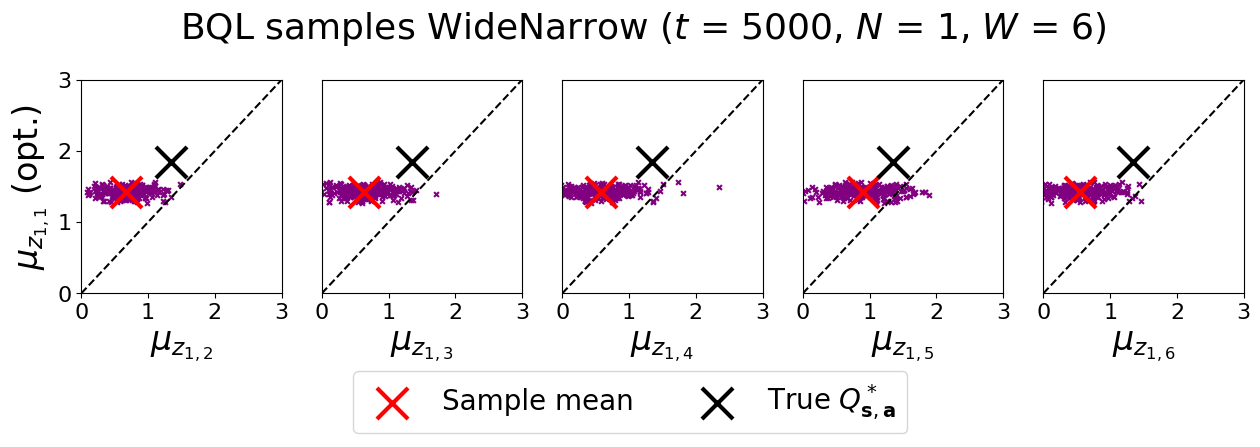

In [ ]:
P, R = environment.get_mean_P_and_R()
pi, Q = solve_tabular_continuing_PI(P, R, gamma=0.9, max_iter=max_iter)

agent = load_agent(environment, BayesianQAgent(agent_params), seed=1)
samples = []

leg_names = ['Sample mean',
             'True $Q^*_{\\mathbf{s}, \\mathbf{a}}$']
leg = [None] * 2

T = plot_time // save_every
for s in range(1):
    for i in range(250):

        environment.s = s

        agent.Qpost = agent.Qpost_log[T]
        samples.append(agent.take_action(s, 0, reduce_max=False)[0])

samples = np.array(samples)

fig = plt.figure(figsize=(15, 4.5))
for a in range(1, W):

    plt.subplot(1, W - 1, a)
    plt.scatter(samples[:, a], samples[:, 0], color='purple', marker='x', s=12)

    leg[0] = plt.scatter(samples[:, a].mean(), samples[:, 0].mean(), color='red', marker='x', s=500, linewidth=3)
    leg[1] = plt.scatter(Q[0, a], Q[0, 0], color='black', marker='x', s=500, linewidth=3)

    plt.plot(np.linspace(0, 3, 2), np.linspace(0, 3, 2), '--', color='black')

    plt.xlim([0, 3])
    plt.ylim([0, 3])

    plt.xlabel('$\mu_{z_{1, ' + str(a + 1) + '}}$', fontsize=24)

    if a == 1:
        plt.ylabel('$\mu_{z_{1, 1}}$ (opt.)', fontsize=24)
    else:
        plt.yticks([])

plt.figlegend(leg, leg_names, loc = 'lower center', ncol=2, labelspacing=0., fontsize=20)
title = 'BQL samples WideNarrow ($t$ = {}, $N$ = {}, $W$ = {})'
plt.suptitle(title.format(plot_time, N, W), fontsize=26)
fig.subplots_adjust(top=0.825, bottom=0.35)

mu0, lamda, alpha, beta = agent.mu0, agent.lamda, agent.alpha, agent.beta
save_name = 'bql-{}-{}-{}-{}-scatter-widenarrow-{}-{}-{}'.format(mu0, lamda, alpha, beta, N, W, plot_time)
save_name = save_name.replace('.', '_')
plt.savefig(fig_loc + save_name + '.pdf', bbox_inches='tight')
plt.show()

<ipython-input-13-f0f2a693bd06>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

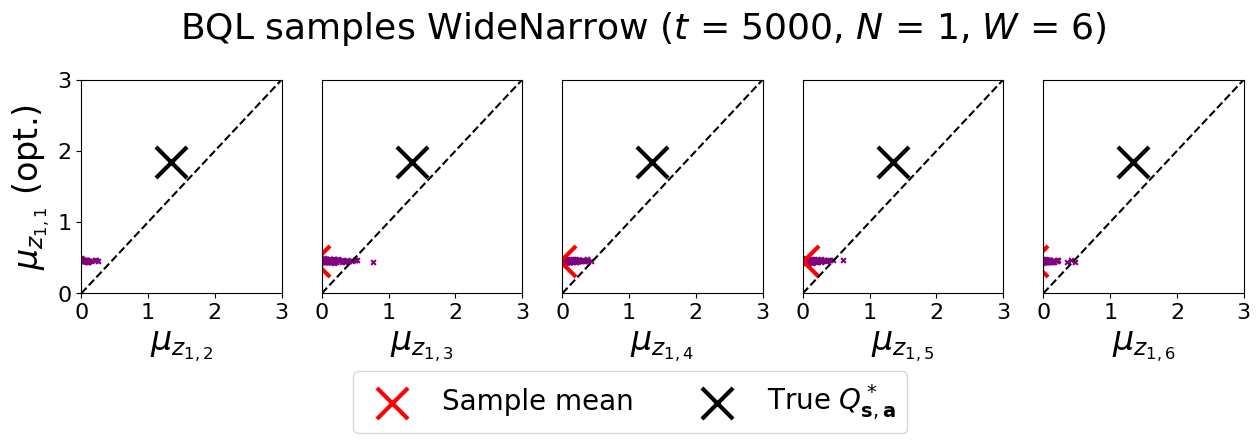

<ipython-input-13-f0f2a693bd06>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pynverse/inverse.py:187: RuntimeWarning: Trouble calculating inverse for values: [0.03188299]
  warnings.warn("Trouble calculating inverse for values: "
/usr/local/lib/python3.10/dist-packages/pynverse/inverse.py:194: RuntimeWarning: Results obtained with less than 2 decimal digits of accuracy
  warnings.warn("Results obtained with less than %g "
/usr/local/lib/python3.10/dist-packages/pynverse/inverse.py:187: RuntimeWarning: Trouble calculating inverse for values: [0.00564052]
  warnings.warn("Trouble calculating inverse for values: "
/usr/local/lib/python3.10/dist-packages/pynverse/inverse.py:194: RuntimeWarning: Results obtained with less than 2 decimal digits of accuracy
  warnings.warn("Results obtained with less than %g "


KeyboardInterrupt: 

In [ ]:
# for a in range(1, 10):
#     for j in range(1, 10):
#         for k in range(1, 10):
#             for l in range(1, 10):
#                 for m in range(1, 10):
#                     agent_params = {'gamma'               : a/10,
#                                     'mu0'                 : 0.0,
#                                     'lamda'               : float(j),
#                                     'alpha'               : float(k),
#                                     'beta'                : float(l),
#                                     'num_mixture_samples' : m*1000,
#                                     'sa_list'             : environment.sa_list()}
#                     for seed in tqdm(range(10)):

#                         # Define agent
#                         agent =  BayesianQAgent(agent_params)

#                         # Run experiment
#                         run_experiment(environment=environment,
#                                       agent=agent,
#                                       seed=seed,
#                                       num_time_steps=num_time_steps,
#                                       max_buffer_length=1,
#                                       save_every=save_every)
#                     P, R = environment.get_mean_P_and_R()
#                     pi, Q = solve_tabular_continuing_PI(P, R, gamma=0.9, max_iter=max_iter)

#                     agent = load_agent(environment, BayesianQAgent(agent_params), seed=1)
#                     samples = []

#                     leg_names = ['Sample mean',
#                                 'True $Q^*_{\\mathbf{s}, \\mathbf{a}}$']
#                     leg = [None] * 2

#                     T = plot_time // save_every
#                     for s in range(1):
#                         for i in range(250):

#                             environment.s = s

#                             agent.Qpost = agent.Qpost_log[T]
#                             samples.append(agent.take_action(s, 0, reduce_max=False)[0])

#                     samples = np.array(samples)

#                     fig = plt.figure(figsize=(15, 4.5))
#                     for a in range(1, W):

#                         plt.subplot(1, W - 1, a)
#                         plt.scatter(samples[:, a], samples[:, 0], color='purple', marker='x', s=12)

#                         leg[0] = plt.scatter(samples[:, a].mean(), samples[:, 0].mean(), color='red', marker='x', s=500, linewidth=3)
#                         leg[1] = plt.scatter(Q[0, a], Q[0, 0], color='black', marker='x', s=500, linewidth=3)

#                         plt.plot(np.linspace(0, 3, 2), np.linspace(0, 3, 2), '--', color='black')

#                         plt.xlim([0, 3])
#                         plt.ylim([0, 3])

#                         plt.xlabel('$\mu_{z_{1, ' + str(a + 1) + '}}$', fontsize=24)

#                         if a == 1:
#                             plt.ylabel('$\mu_{z_{1, 1}}$ (opt.)', fontsize=24)
#                         else:
#                             plt.yticks([])

#                     plt.figlegend(leg, leg_names, loc = 'lower center', ncol=2, labelspacing=0., fontsize=20)
#                     title = 'BQL samples WideNarrow ($t$ = {}, $N$ = {}, $W$ = {})'
#                     plt.suptitle(title.format(plot_time, N, W), fontsize=26)
#                     fig.subplots_adjust(top=0.825, bottom=0.35)

#                     mu0, lamda, alpha, beta = agent.mu0, agent.lamda, agent.alpha, agent.beta
#                     save_name = 'bql-{}-{}-{}-{}-scatter-widenarrow-{}-{}-{}'.format(mu0, lamda, alpha, beta, N, W, plot_time)
#                     save_name = save_name.replace('.', '_')
#                     plt.savefig(fig_loc + save_name + '.pdf', bbox_inches='tight')
#                     plt.show()

<ipython-input-7-78d35a9caeeb>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

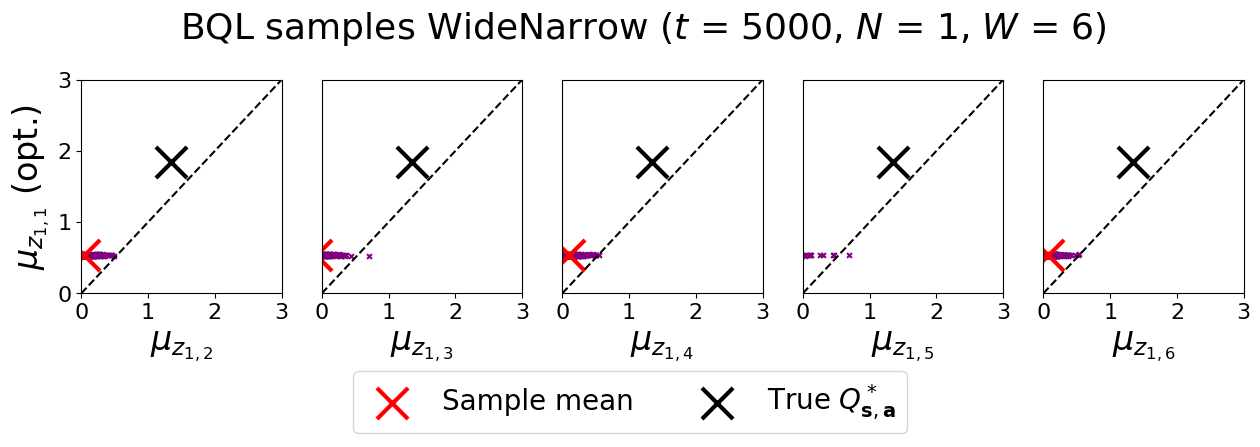

<ipython-input-7-78d35a9caeeb>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

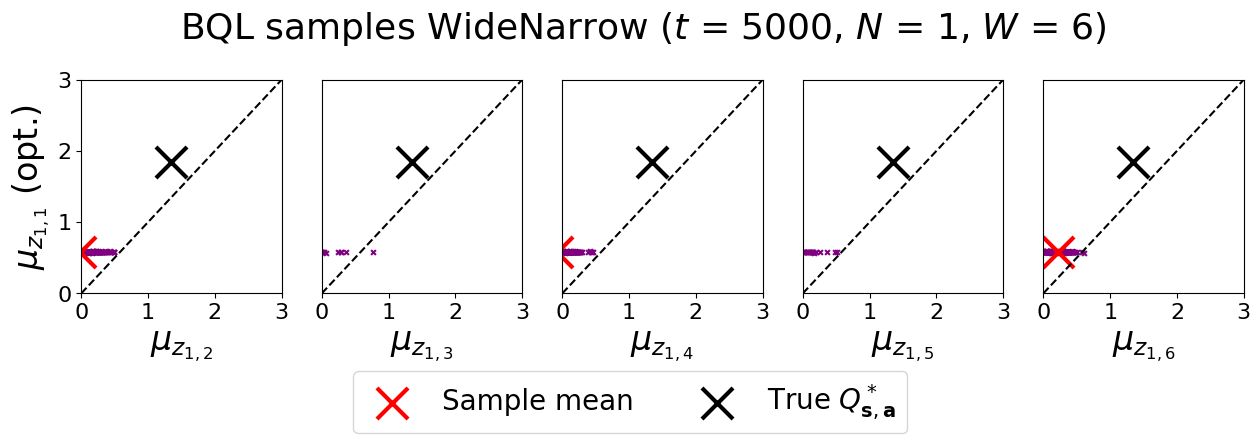

<ipython-input-7-78d35a9caeeb>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

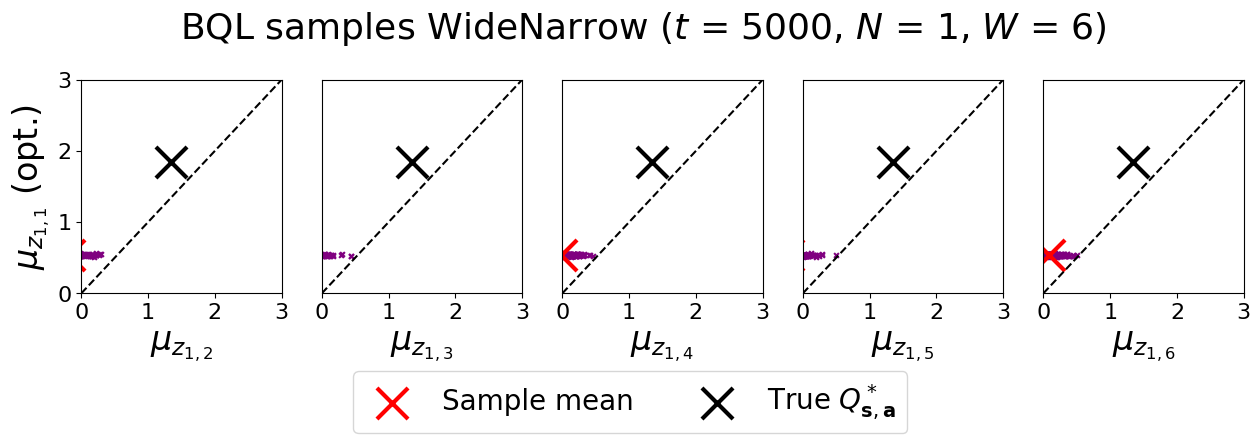

<ipython-input-7-78d35a9caeeb>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

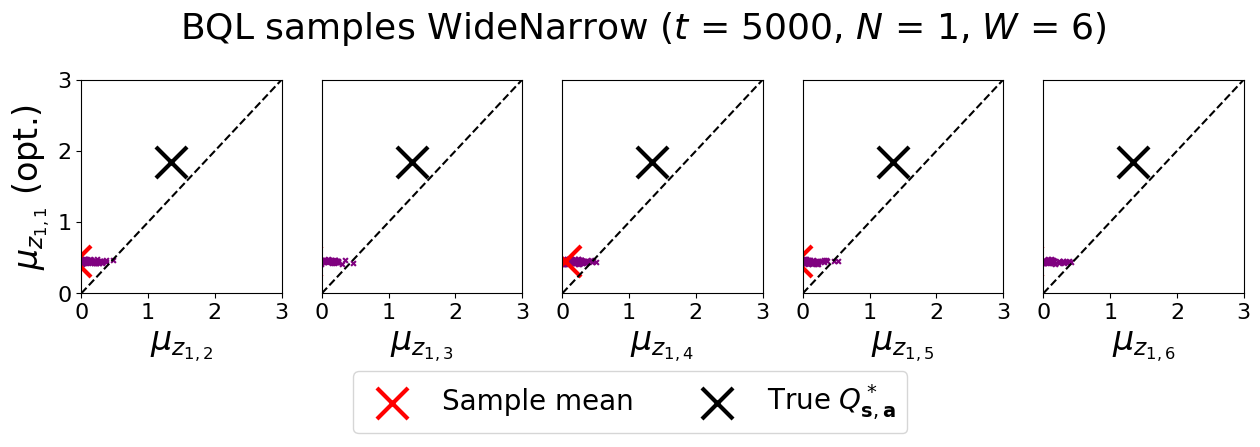

<ipython-input-7-78d35a9caeeb>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

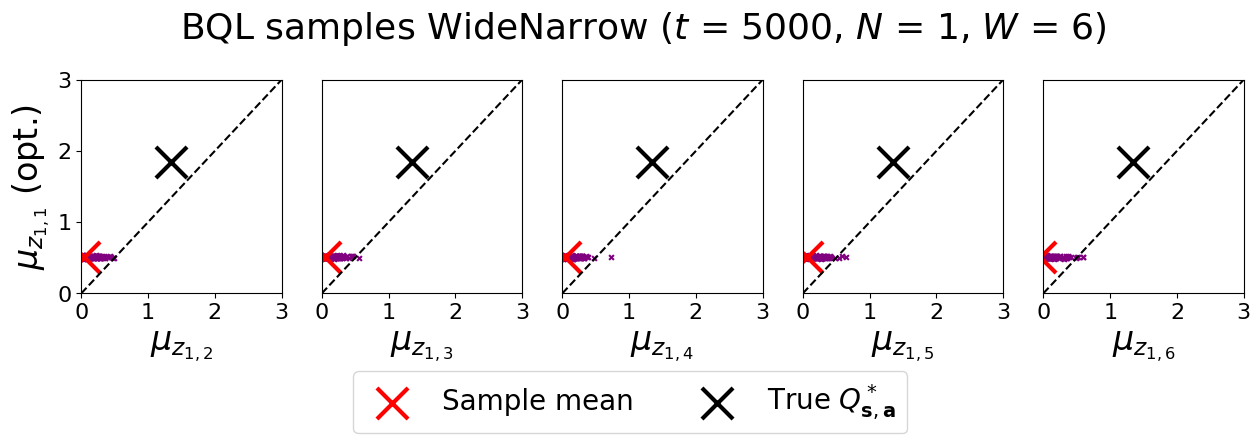

<ipython-input-7-78d35a9caeeb>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

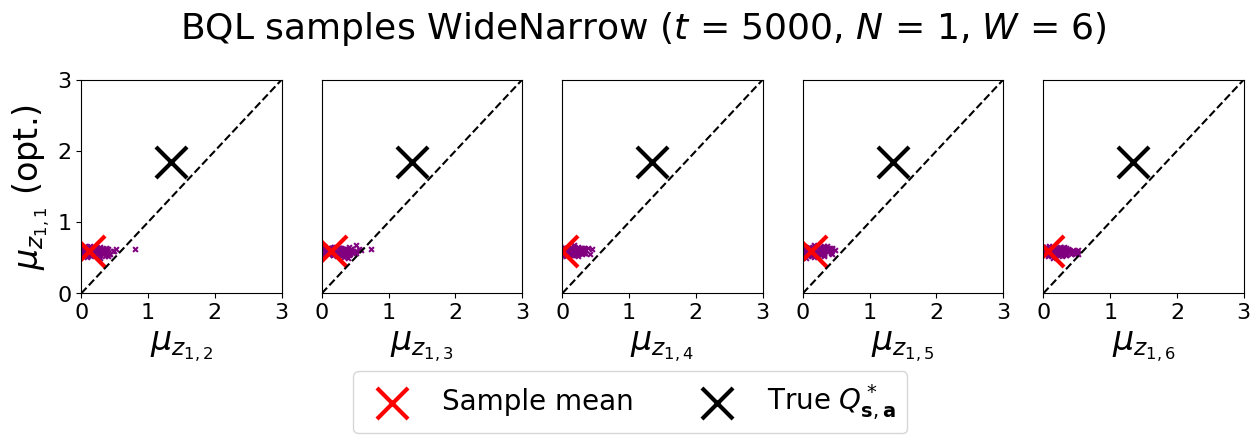

<ipython-input-7-78d35a9caeeb>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

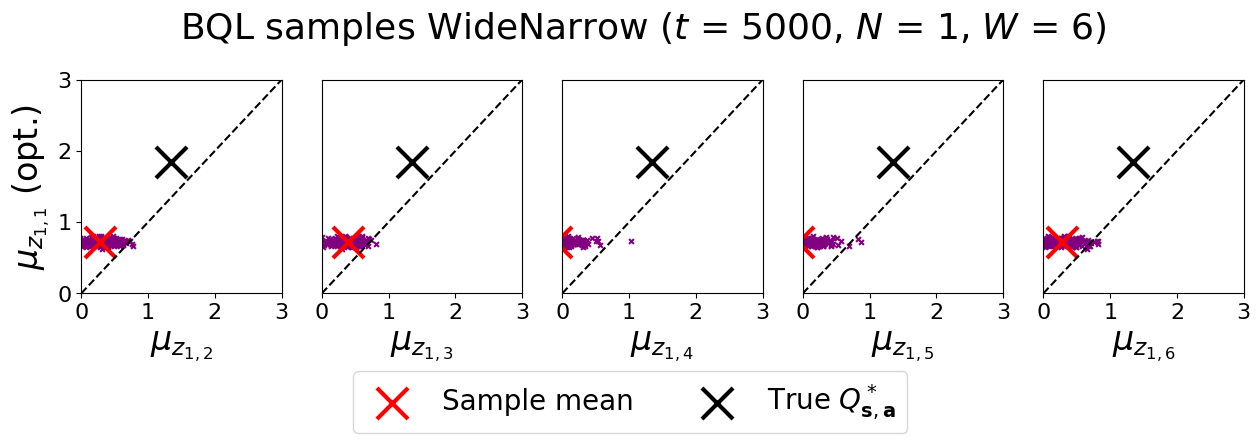

<ipython-input-7-78d35a9caeeb>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

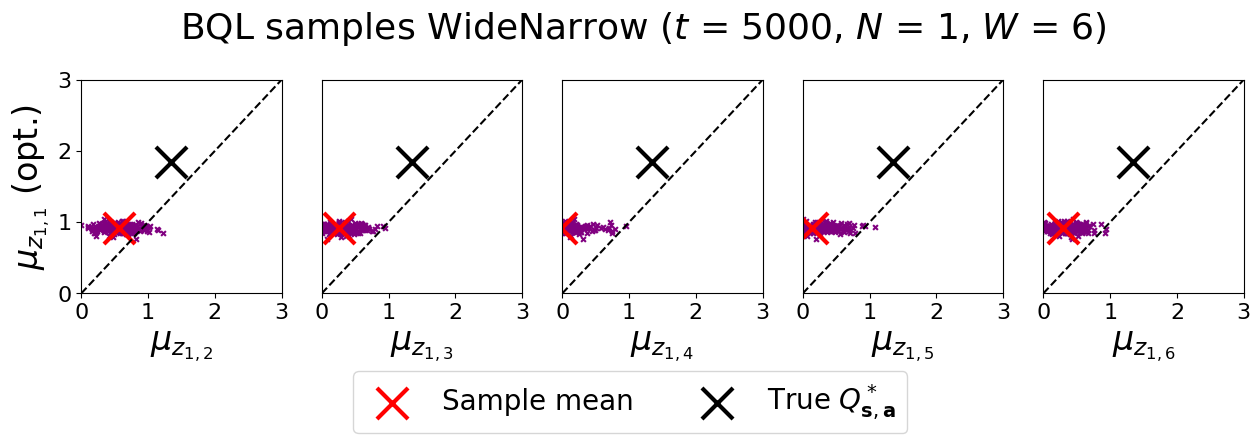

<ipython-input-7-78d35a9caeeb>:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

<ipython-input-1-80924a9e8318>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

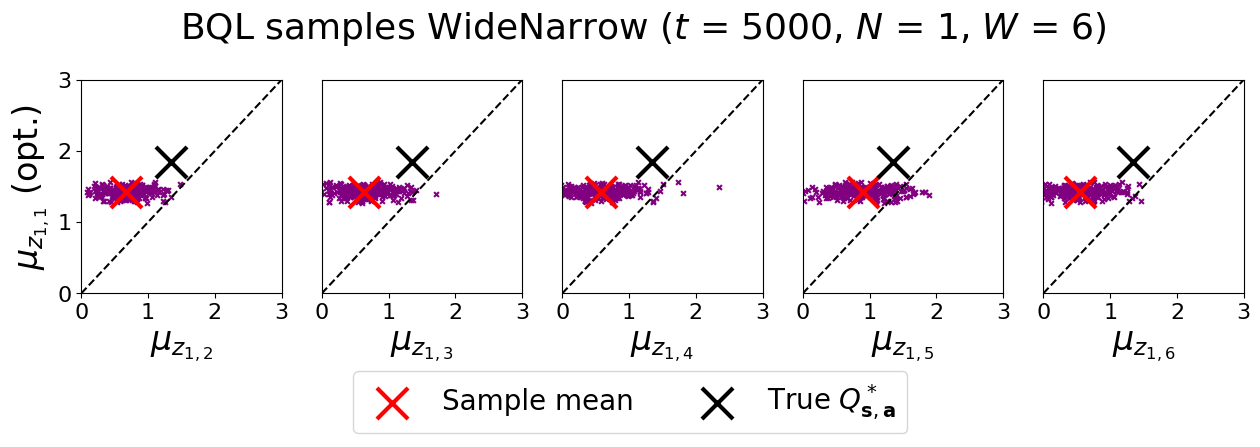

In [ ]:
for a in range(1, 10):
  agent_params = {'gamma'               : a/10,
                  'mu0'                 : 0.0,
                  'lamda'               : 4.0,
                  'alpha'               : 3.0,
                  'beta'                : 3.0,
                  'num_mixture_samples' : 1000,
                  'sa_list'             : environment.sa_list()}
  for seed in tqdm(range(10)):

      # Define agent
      agent =  BayesianQAgent(agent_params)

      # Run experiment
      run_experiment(environment=environment,
                    agent=agent,
                    seed=seed,
                    num_time_steps=num_time_steps,
                    max_buffer_length=1,
                    save_every=save_every)
  P, R = environment.get_mean_P_and_R()
  pi, Q = solve_tabular_continuing_PI(P, R, gamma=0.9, max_iter=max_iter)

  agent = load_agent(environment, BayesianQAgent(agent_params), seed=1)
  samples = []

  leg_names = ['Sample mean',
              'True $Q^*_{\\mathbf{s}, \\mathbf{a}}$']
  leg = [None] * 2

  T = plot_time // save_every
  for s in range(1):
      for i in range(250):

          environment.s = s

          agent.Qpost = agent.Qpost_log[T]
          samples.append(agent.take_action(s, 0, reduce_max=False)[0])

  samples = np.array(samples)

  fig = plt.figure(figsize=(15, 4.5))
  for a in range(1, W):

      plt.subplot(1, W - 1, a)
      plt.scatter(samples[:, a], samples[:, 0], color='purple', marker='x', s=12)

      leg[0] = plt.scatter(samples[:, a].mean(), samples[:, 0].mean(), color='red', marker='x', s=500, linewidth=3)
      leg[1] = plt.scatter(Q[0, a], Q[0, 0], color='black', marker='x', s=500, linewidth=3)

      plt.plot(np.linspace(0, 3, 2), np.linspace(0, 3, 2), '--', color='black')

      plt.xlim([0, 3])
      plt.ylim([0, 3])

      plt.xlabel('$\mu_{z_{1, ' + str(a + 1) + '}}$', fontsize=24)

      if a == 1:
          plt.ylabel('$\mu_{z_{1, 1}}$ (opt.)', fontsize=24)
      else:
          plt.yticks([])

  plt.figlegend(leg, leg_names, loc = 'lower center', ncol=2, labelspacing=0., fontsize=20)
  title = 'BQL samples WideNarrow ($t$ = {}, $N$ = {}, $W$ = {})'
  plt.suptitle(title.format(plot_time, N, W), fontsize=26)
  fig.subplots_adjust(top=0.825, bottom=0.35)

  mu0, lamda, alpha, beta = agent.mu0, agent.lamda, agent.alpha, agent.beta
  save_name = 'bql-{}-{}-{}-{}-scatter-widenarrow-{}-{}-{}'.format(mu0, lamda, alpha, beta, N, W, plot_time)
  save_name = save_name.replace('.', '_')
  plt.savefig(fig_loc + save_name + '.pdf', bbox_inches='tight')
  plt.show()

## UBE

In [ ]:
agent_params = {'gamma'            : 0.9,
                'kappa'            : 1.0,
                'mu0'              : 0.0,
                'lamda'            : 4.0,
                'alpha'            : 3.0,
                'beta'             : 3.0,
                'Rmax'             : environment.get_mean_P_and_R()[1].max(),
                'max_iter'         : max_iter,
                'zeta'             : 1.0,
                'num_dyn_samples'  : 100,
                'sa_list'          : environment.sa_list()}

In [ ]:
for seed in tqdm(range(10)):

    # Define agent
    agent = UbeNoUnrollAgent(agent_params)

    # Run experiment
    run_experiment(environment=environment,
                   agent=agent,
                   seed=seed,
                   num_time_steps=num_time_steps,
                   max_buffer_length=max_buffer_length,
                   save_every=save_every)

<ipython-input-30-a4c06a25e89c>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-23-d2381441adab>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

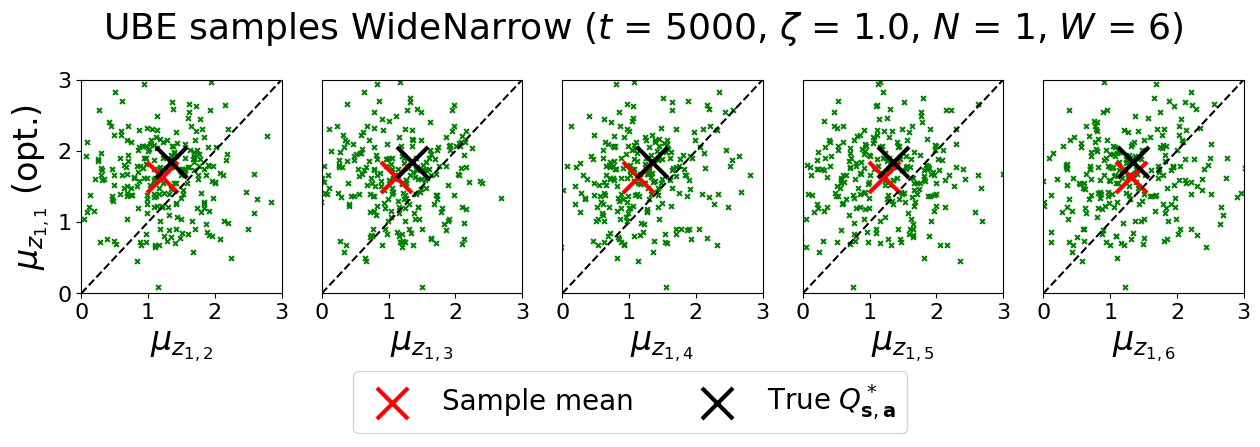

In [ ]:
P, R = environment.get_mean_P_and_R()
pi, Q = solve_tabular_continuing_PI(P, R, gamma=0.9, max_iter=max_iter)

agent = load_agent(environment, UbeNoUnrollAgent(agent_params), seed=1)
samples = []

leg_names = ['Sample mean',
             'True $Q^*_{\\mathbf{s}, \\mathbf{a}}$']
leg = [None] * 2

T = plot_time // save_every
for s in range(1):

    Qmu = agent.Qmu_log[T]
    Qvar = agent.Qvar_log[T]

    for i in range(250):

        environment.s = s
        samples.append(np.random.normal(Qmu[s, :], agent.zeta * Qvar[s, :]**0.5))

samples = np.array(samples)

fig = plt.figure(figsize=(15, 4.5))
for a in range(1, W):

    plt.subplot(1, W - 1, a)
    plt.scatter(samples[:, a], samples[:, 0], color='green', marker='x', s=12)
    leg[0] = plt.scatter(samples[:, a].mean(), samples[:, 0].mean(), color='red', marker='x', s=500, linewidth=3)
    leg[1] = plt.scatter(Q[0, a], Q[0, 0], color='black', marker='x', s=500, linewidth=3)
    plt.plot(np.linspace(0, 3, 2), np.linspace(0, 3, 2), '--', color='black')

    plt.xlim([0, 3])
    plt.ylim([0, 3])

    plt.xlabel('$\mu_{z_{1, ' + str(a + 1) + '}}$', fontsize=24)

    if a == 1:
        plt.ylabel('$\mu_{z_{1, 1}}$ (opt.)', fontsize=24)
    else:
        plt.yticks([])

plt.figlegend(leg, leg_names, loc = 'lower center', ncol=2, labelspacing=0., fontsize=20)
title = 'UBE samples WideNarrow ($t$ = {}, $\zeta$ = {}, $N$ = {}, $W$ = {})'
plt.suptitle(title.format(plot_time, agent.zeta, N, W), fontsize=26)
fig.subplots_adjust(top=0.825, bottom=0.35)

mu0, lamda, alpha, beta, zeta = agent.mu0, agent.lamda, agent.alpha, agent.beta, agent.zeta
save_name = 'ube-{}-{}-{}-{}-{}-scatter-widenarrow-{}-{}-{}'.format(mu0, lamda, alpha, beta, zeta, N, W, plot_time)
save_name = save_name.replace('.', '_')
plt.savefig(fig_loc + save_name + '.pdf', bbox_inches='tight')
plt.show()

<ipython-input-41-81f73f3c601e>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-23-d2381441adab>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

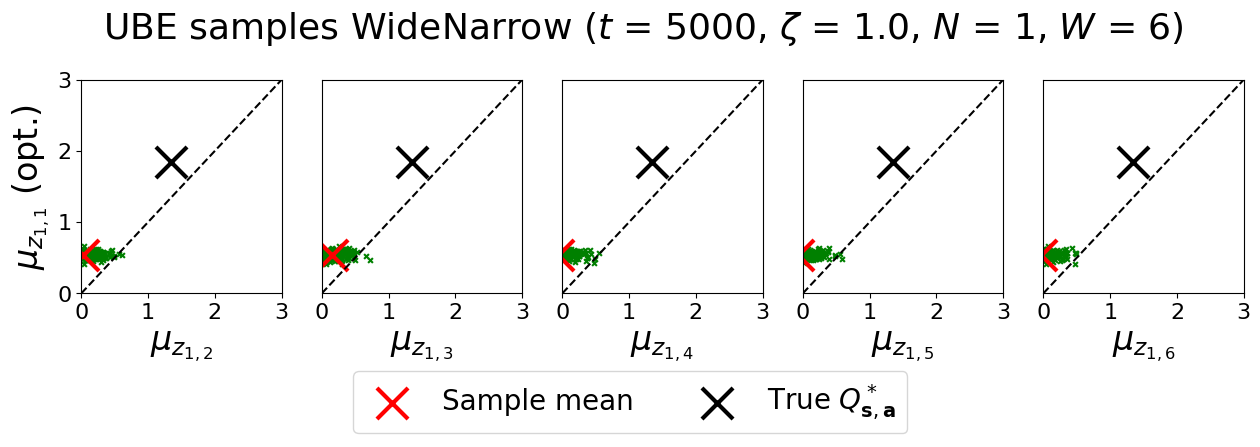

<ipython-input-41-81f73f3c601e>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-23-d2381441adab>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

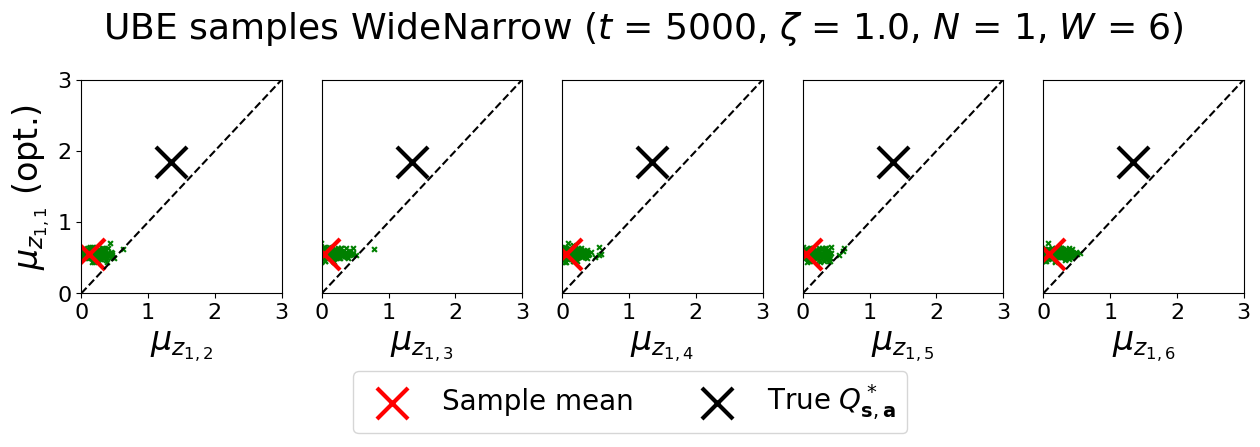

<ipython-input-41-81f73f3c601e>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-23-d2381441adab>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

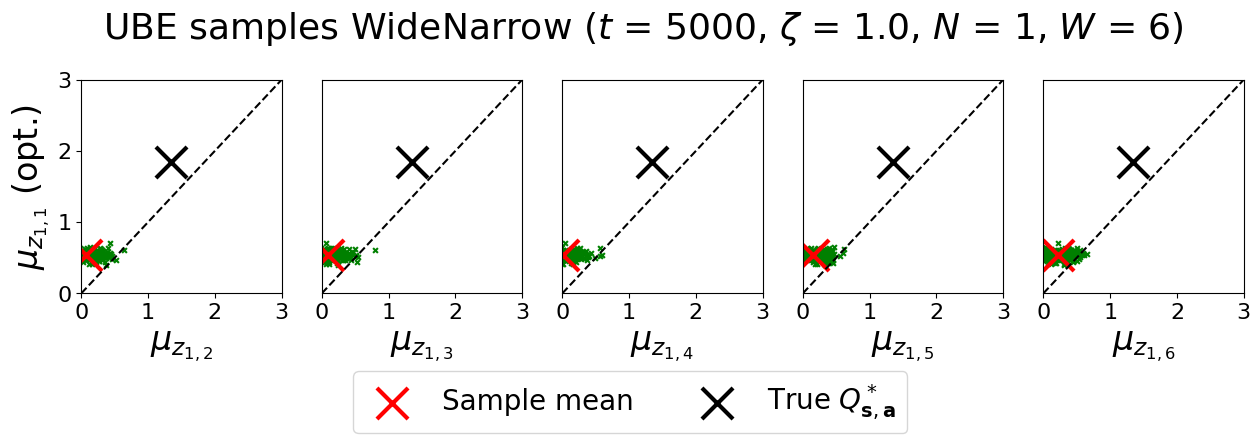

<ipython-input-41-81f73f3c601e>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-23-d2381441adab>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

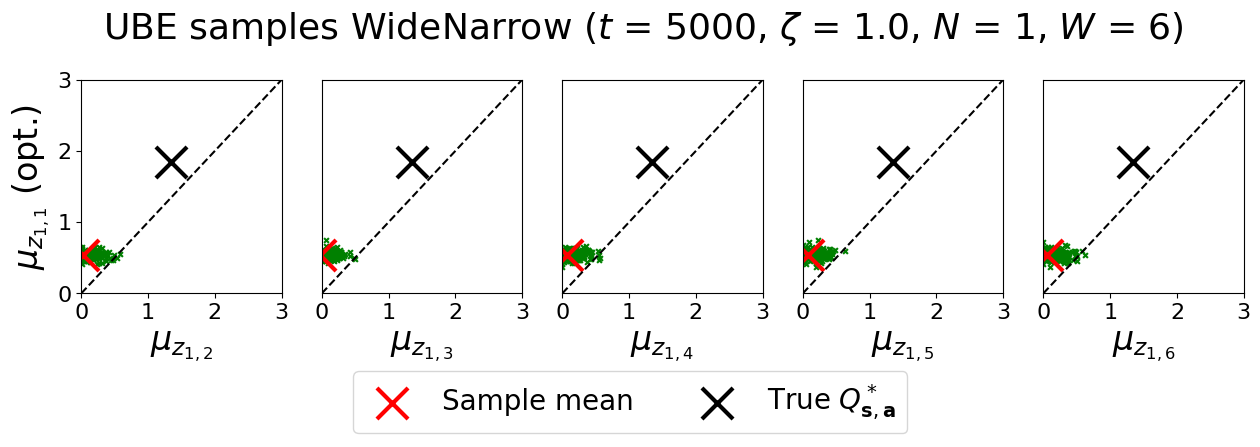

<ipython-input-41-81f73f3c601e>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-23-d2381441adab>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

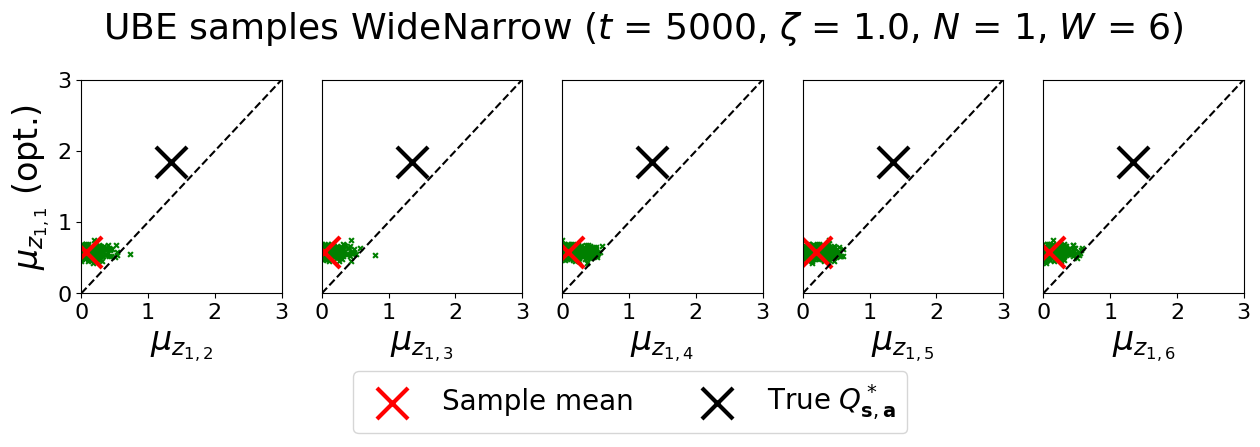

<ipython-input-41-81f73f3c601e>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-23-d2381441adab>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

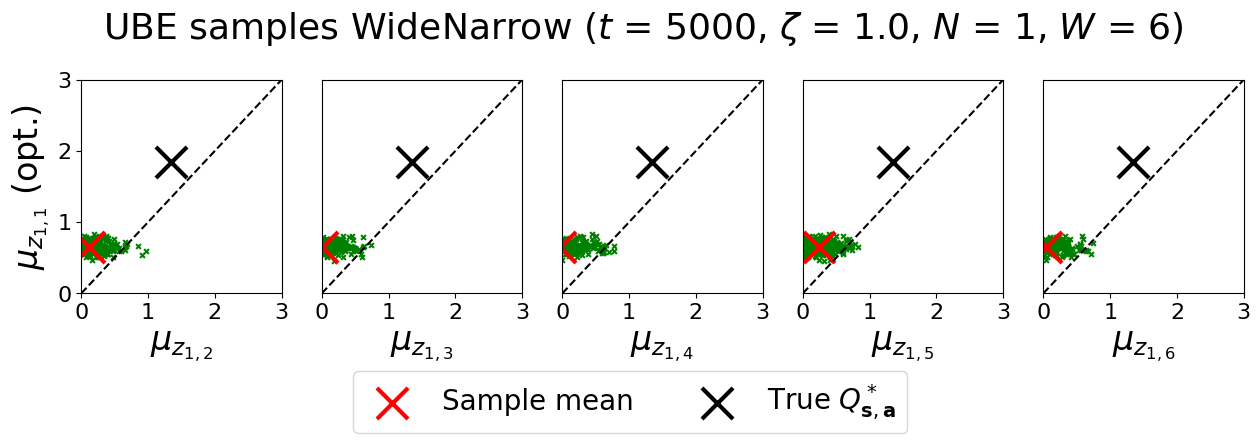

<ipython-input-41-81f73f3c601e>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-23-d2381441adab>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

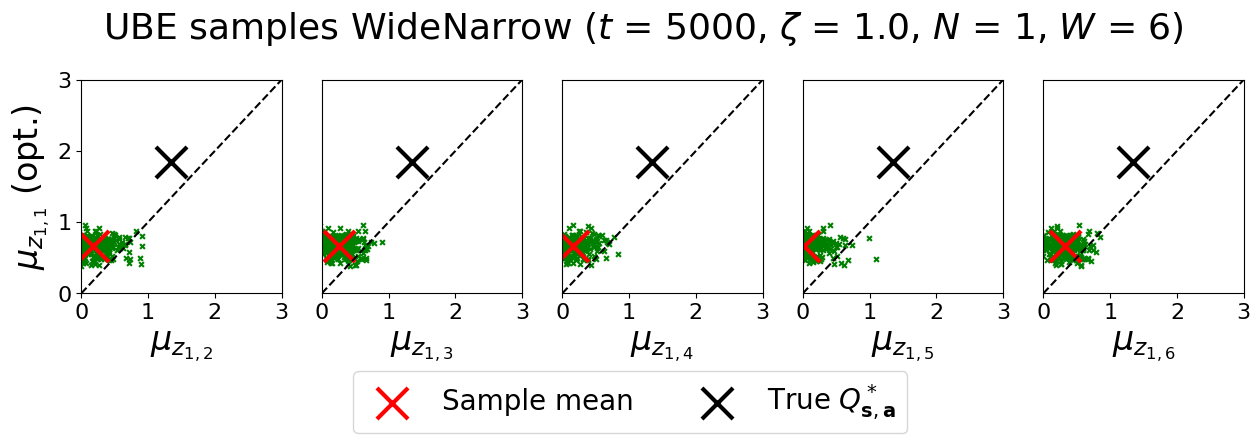

<ipython-input-41-81f73f3c601e>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-23-d2381441adab>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

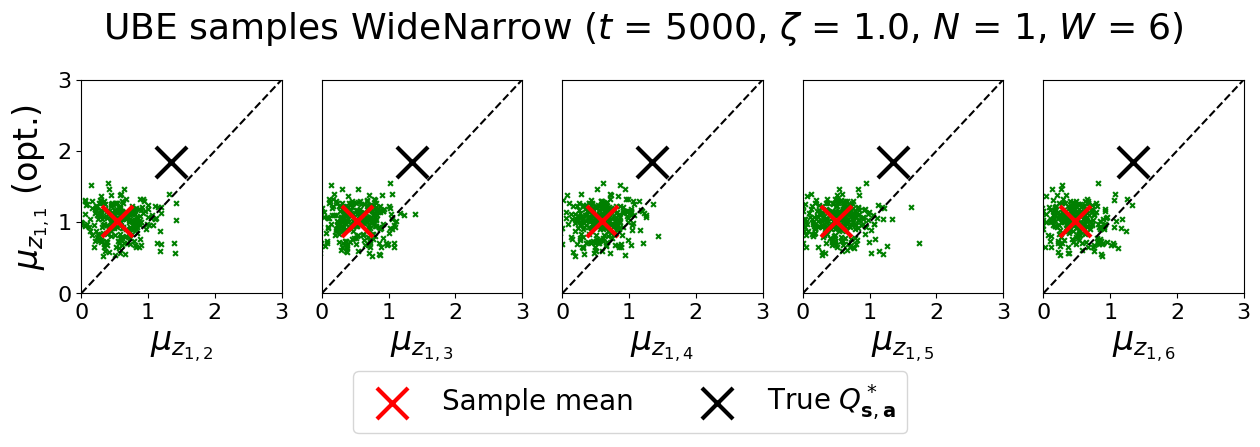

<ipython-input-41-81f73f3c601e>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for seed in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-23-d2381441adab>:120: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(num_time_steps + 1)):


  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

  0%|          | 0/5001 [00:00<?, ?it/s]

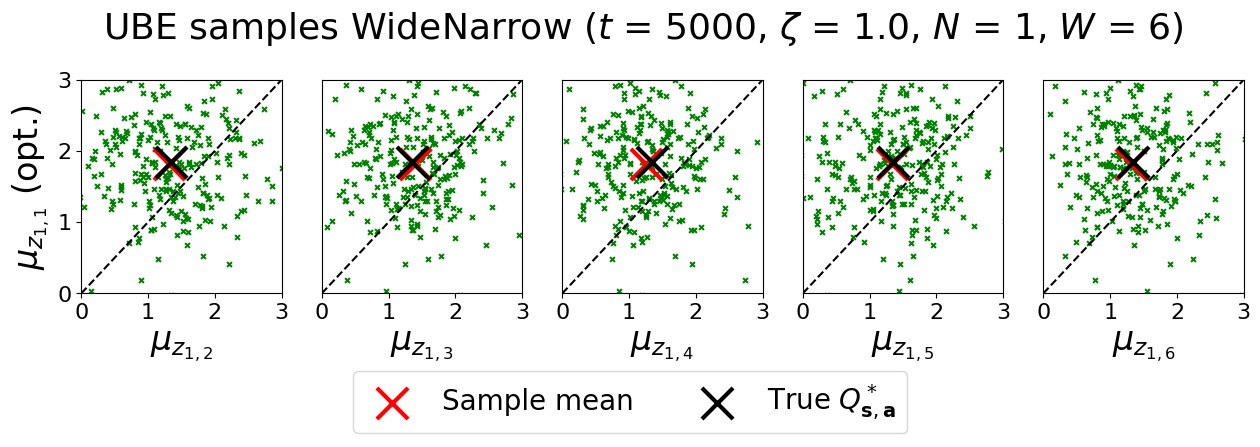

In [ ]:
for a in range(1, 10):
  agent_params = {'gamma'            : a/10,
                'kappa'            : 1.0,
                'mu0'              : 0.0,
                'lamda'            : 4.0,
                'alpha'            : 3.0,
                'beta'             : 3.0,
                'Rmax'             : environment.get_mean_P_and_R()[1].max(),
                'max_iter'         : max_iter,
                'zeta'             : 1.0,
                'num_dyn_samples'  : 100,
                'sa_list'          : environment.sa_list()}
  for seed in tqdm(range(10)):

      # Define agent
      agent =  UbeNoUnrollAgent(agent_params)

      # Run experiment
      run_experiment(environment=environment,
                    agent=agent,
                    seed=seed,
                    num_time_steps=num_time_steps,
                    max_buffer_length=1,
                    save_every=save_every)
  P, R = environment.get_mean_P_and_R()
  pi, Q = solve_tabular_continuing_PI(P, R, gamma=0.9, max_iter=max_iter)

  agent = load_agent(environment, UbeNoUnrollAgent(agent_params), seed=1)
  samples = []

  leg_names = ['Sample mean',
              'True $Q^*_{\\mathbf{s}, \\mathbf{a}}$']
  leg = [None] * 2

  T = plot_time // save_every
  for s in range(1):

      Qmu = agent.Qmu_log[T]
      Qvar = agent.Qvar_log[T]

      for i in range(250):

          environment.s = s
          samples.append(np.random.normal(Qmu[s, :], agent.zeta * Qvar[s, :]**0.5))

  samples = np.array(samples)

  fig = plt.figure(figsize=(15, 4.5))
  for a in range(1, W):

      plt.subplot(1, W - 1, a)
      plt.scatter(samples[:, a], samples[:, 0], color='green', marker='x', s=12)
      leg[0] = plt.scatter(samples[:, a].mean(), samples[:, 0].mean(), color='red', marker='x', s=500, linewidth=3)
      leg[1] = plt.scatter(Q[0, a], Q[0, 0], color='black', marker='x', s=500, linewidth=3)
      plt.plot(np.linspace(0, 3, 2), np.linspace(0, 3, 2), '--', color='black')

      plt.xlim([0, 3])
      plt.ylim([0, 3])

      plt.xlabel('$\mu_{z_{1, ' + str(a + 1) + '}}$', fontsize=24)

      if a == 1:
          plt.ylabel('$\mu_{z_{1, 1}}$ (opt.)', fontsize=24)
      else:
          plt.yticks([])

  plt.figlegend(leg, leg_names, loc = 'lower center', ncol=2, labelspacing=0., fontsize=20)
  title = 'UBE samples WideNarrow ($t$ = {}, $\zeta$ = {}, $N$ = {}, $W$ = {})'
  plt.suptitle(title.format(plot_time, agent.zeta, N, W), fontsize=26)
  fig.subplots_adjust(top=0.825, bottom=0.35)

  mu0, lamda, alpha, beta, zeta = agent.mu0, agent.lamda, agent.alpha, agent.beta, agent.zeta
  save_name = 'ube-{}-{}-{}-{}-{}-scatter-widenarrow-{}-{}-{}'.format(mu0, lamda, alpha, beta, zeta, N, W, plot_time)
  save_name = save_name.replace('.', '_')
  plt.savefig(fig_loc + save_name + '.pdf', bbox_inches='tight')
  plt.show()